In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='./Marianne-Regular.otf')

In [3]:
df = pd.read_csv('departement2021.csv',dtype=str)
deps = gpd.read_file('deptot.geojson')
points = gpd.read_file('pref.geojson')

In [4]:
databrut = pd.read_csv('https://www.data.gouv.fr/fr/datasets/r/16f4fd03-797f-4616-bca9-78ff212d06e8',dtype=str,sep=";")
data = databrut.rename(columns={'dep':'code','Prc_susp_501Y_V1':'data'})
data.data = data.data.astype(float)

In [5]:
data = data[data['semaine'] == data.semaine.max()]
data = data[data.cl_age90 == '0']

In [6]:
data

code                semaine cl_age90 Nb_tests_PCR_TA_crible  \
27065   01  2021-03-09-2021-03-15        0                    862   
27091   02  2021-03-09-2021-03-15        0                   1004   
27117   03  2021-03-09-2021-03-15        0                    469   
27143   04  2021-03-09-2021-03-15        0                    197   
27169   05  2021-03-09-2021-03-15        0                    194   
...    ...                    ...      ...                    ...   
29639  974  2021-03-09-2021-03-15        0                    445   
29665  975  2021-03-09-2021-03-15        0                      0   
29691  976  2021-03-09-2021-03-15        0                     65   
29717  977  2021-03-09-2021-03-15        0                      0   
29743  978  2021-03-09-2021-03-15        0                      1   

      Prc_tests_PCR_TA_crible Nb_susp_501Y_V1   data Nb_susp_501Y_V2_3  \
27065                    61.5             663   76.9                30   
27091                    57.9             759   75.6                10   
27117                    72.6             313   66.7                 8   
27143                    44.7             148   75.1                11   
27169                    44.4             137   70.6                18   
...                       ...             ...    ...               ...   
29639                    45.2              41    9.2               201   
29665                       0               0    0.0                 0   
29691                    12.7               2    3.1                14   
29717                       0               0    0.0                 0   
29743                     5.3               1  100.0                 0   

      Prc_susp_501Y_V2_3 Nb_susp_IND Prc_susp_IND Nb_susp_ABS Prc_susp_ABS  
27065                3.5          20          2.3         149         17.3  
27091                  1         120           12         115         11.5  
27117                1.7          39          8.3         109         23.2  
27143                5.6           5          2.5          33         16.8  
27169                9.3           8          4.1          31           16  
...                  ...         ...          ...         ...          ...  
29639               45.2         103         23.1         100         22.5  
29665                  0           0            0           0            0  
29691               21.5          25         38.5          24         36.9  
29717                  0           0            0           0            0  
29743                  0           0            0           0            0  

[104 rows x 13 columns]

In [7]:
data

code                semaine cl_age90 Nb_tests_PCR_TA_crible  \
27065   01  2021-03-09-2021-03-15        0                    862   
27091   02  2021-03-09-2021-03-15        0                   1004   
27117   03  2021-03-09-2021-03-15        0                    469   
27143   04  2021-03-09-2021-03-15        0                    197   
27169   05  2021-03-09-2021-03-15        0                    194   
...    ...                    ...      ...                    ...   
29639  974  2021-03-09-2021-03-15        0                    445   
29665  975  2021-03-09-2021-03-15        0                      0   
29691  976  2021-03-09-2021-03-15        0                     65   
29717  977  2021-03-09-2021-03-15        0                      0   
29743  978  2021-03-09-2021-03-15        0                      1   

      Prc_tests_PCR_TA_crible Nb_susp_501Y_V1   data Nb_susp_501Y_V2_3  \
27065                    61.5             663   76.9                30   
27091                    57.9             759   75.6                10   
27117                    72.6             313   66.7                 8   
27143                    44.7             148   75.1                11   
27169                    44.4             137   70.6                18   
...                       ...             ...    ...               ...   
29639                    45.2              41    9.2               201   
29665                       0               0    0.0                 0   
29691                    12.7               2    3.1                14   
29717                       0               0    0.0                 0   
29743                     5.3               1  100.0                 0   

      Prc_susp_501Y_V2_3 Nb_susp_IND Prc_susp_IND Nb_susp_ABS Prc_susp_ABS  
27065                3.5          20          2.3         149         17.3  
27091                  1         120           12         115         11.5  
27117                1.7          39          8.3         109         23.2  
27143                5.6           5          2.5          33         16.8  
27169                9.3           8          4.1          31           16  
...                  ...         ...          ...         ...          ...  
29639               45.2         103         23.1         100         22.5  
29665                  0           0            0           0            0  
29691               21.5          25         38.5          24         36.9  
29717                  0           0            0           0            0  
29743                  0           0            0           0            0  

[104 rows x 13 columns]

In [8]:
%matplotlib inline

FileNotFoundError: [Errno 2] No such file or directory: 'data/reg/variant-reg-84.png'

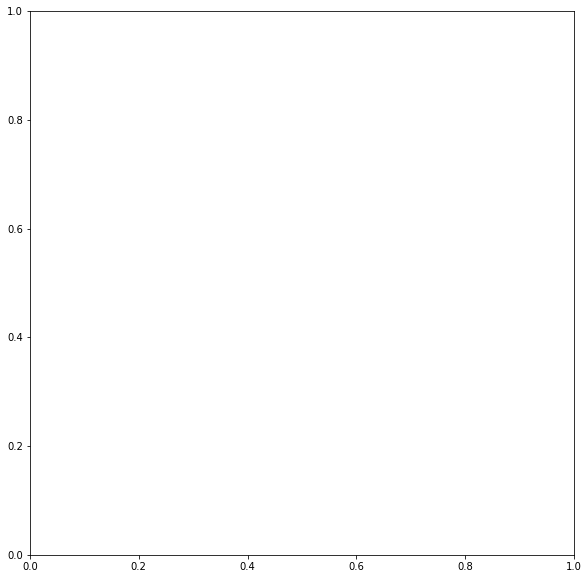

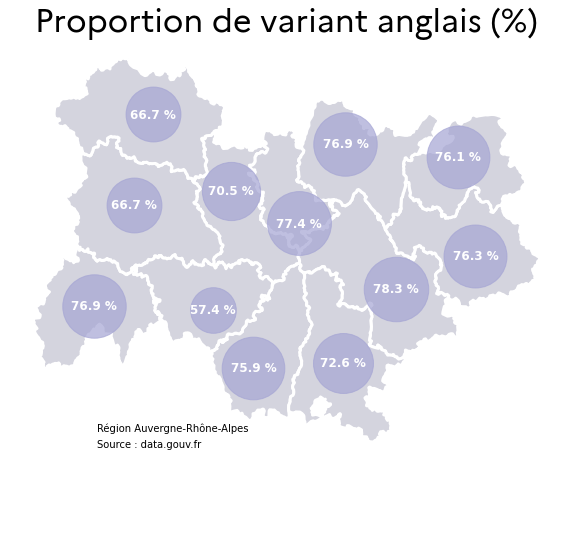

In [10]:
for r in df.REG.unique():
    naq = df[df['REG'] == r].DEP.unique()
    states = pd.merge(deps,data,on='code',how='left')
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.rcParams['figure.figsize'] = (10, 10)
    #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
    base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
    pref = points[points['DeptNum'].isin(naq)]
    max = states[states['code'].isin(naq)]['data'].max()
    min = states[states['code'].isin(naq)]['data'].min()
    for d in pref.DeptNum.unique():
        rd = states[states['code'] == d]['data'].iloc[0]
        if(max-min != 0):
            size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
        else:
            size = 1000/pref.shape[0]*20
        pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
    base.axis('off')
    for dep in pref.DeptNum.unique():
        txt = str(states[states['code'] == dep]['data'].iloc[0])+' %'
        base.annotate(txt,
                      xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                      color='white',
                      fontsize="large", weight='heavy',
                      horizontalalignment='center',
                      verticalalignment='center')
    base.set_title('Proportion de variant anglais (%)', fontproperties=prop, size=32)
    
    base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
              verticalalignment='center', transform=ax.transAxes)
    base.text(0, 0.03, 'Région '+df[df['REG'] == r]['libelle_reg'].iloc[0], horizontalalignment='left',
              verticalalignment='center', transform=ax.transAxes)
    base.figure.savefig('data/reg/variant-reg-'+r+'.png')

/Users/geoffreyaldebert/etalab/projects/analysis/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  after removing the cwd from sys.path.


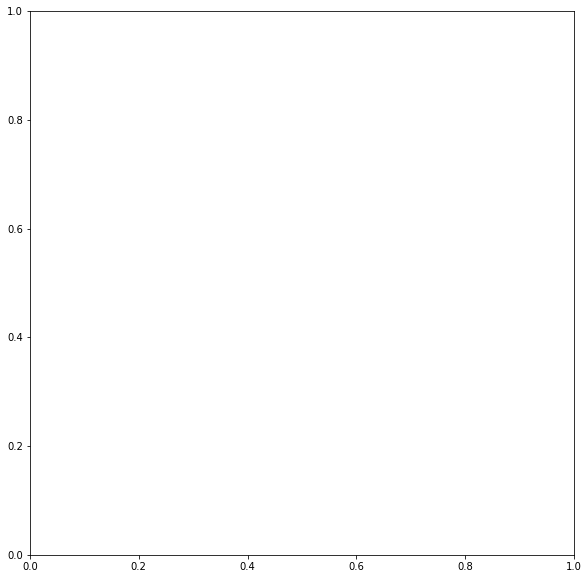

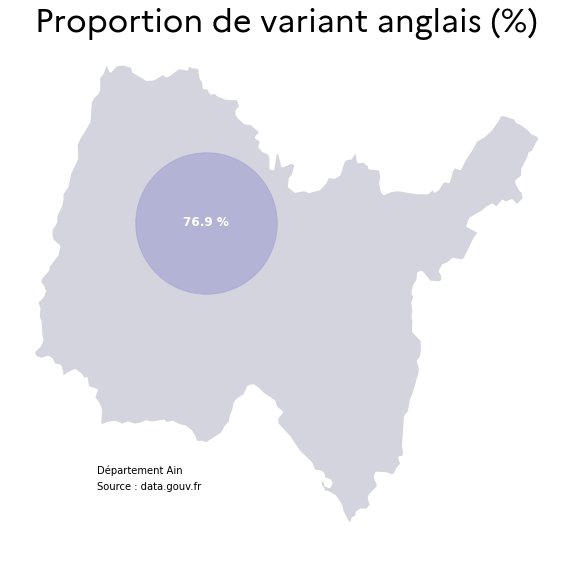

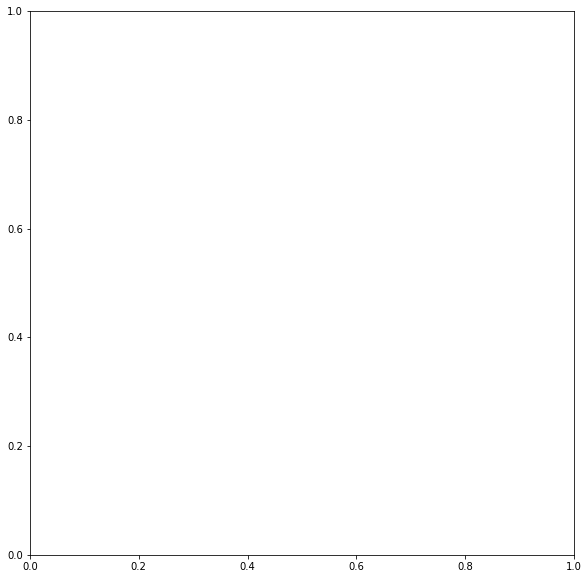

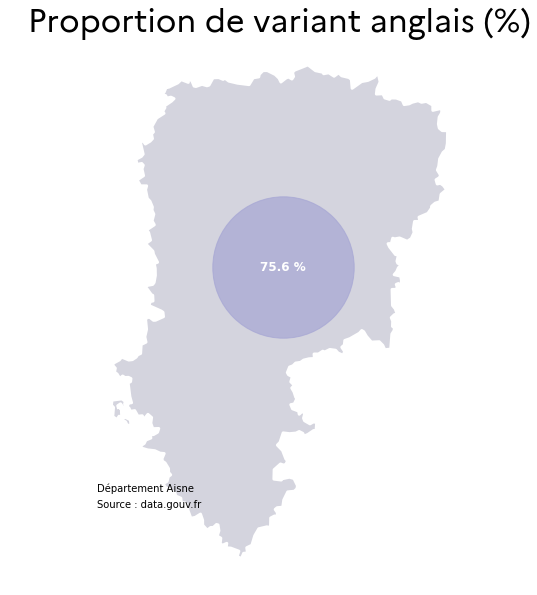

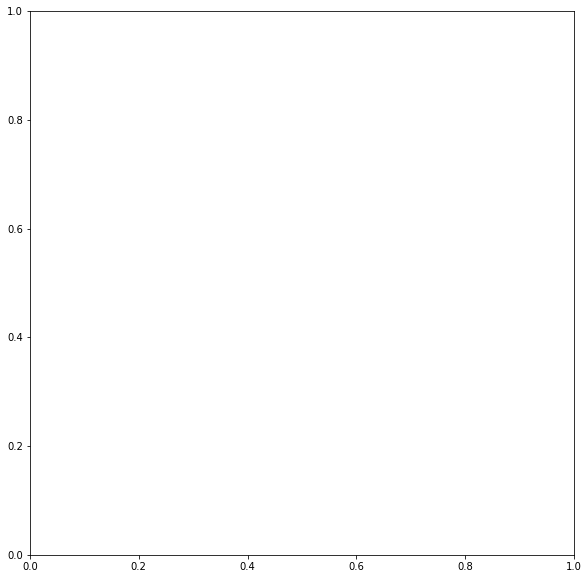

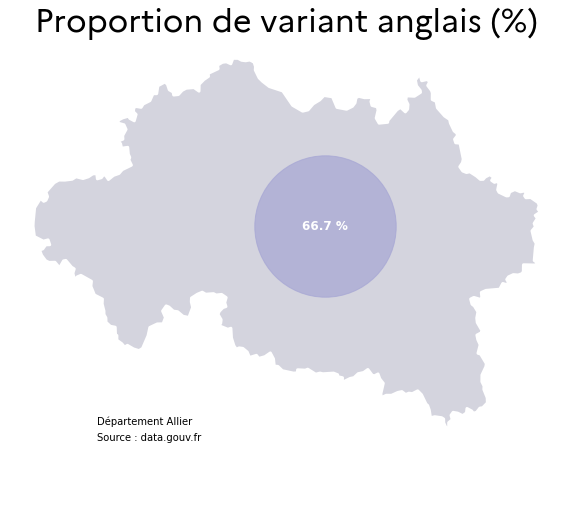

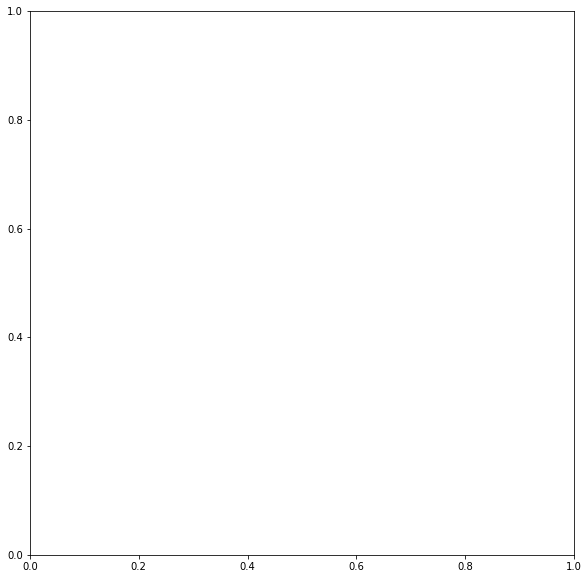

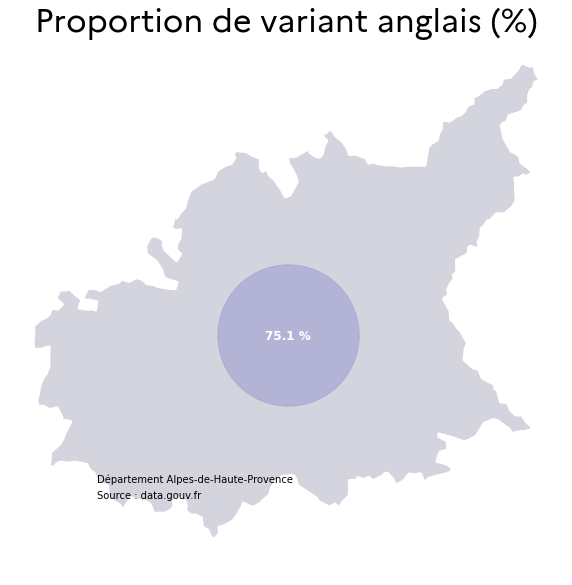

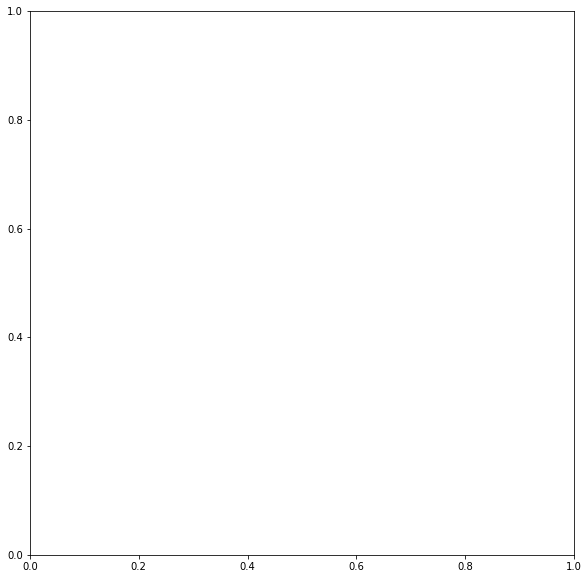

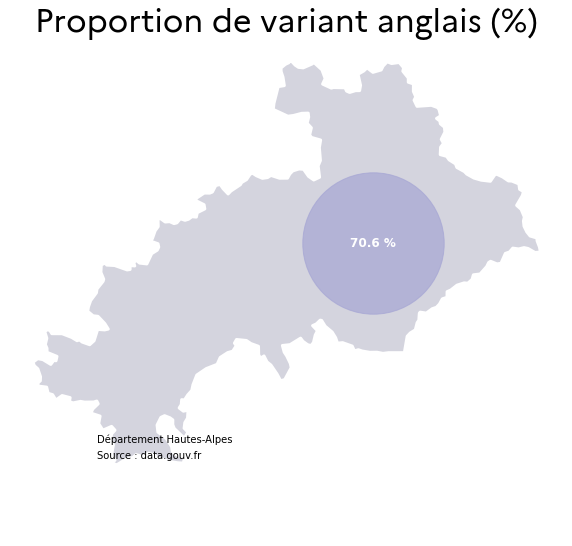

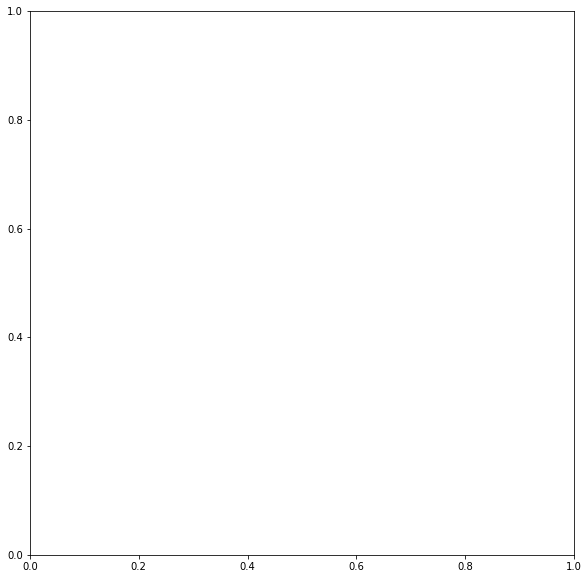

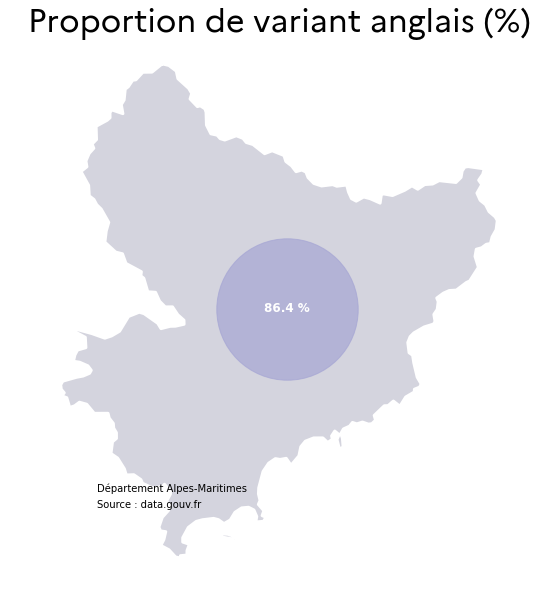

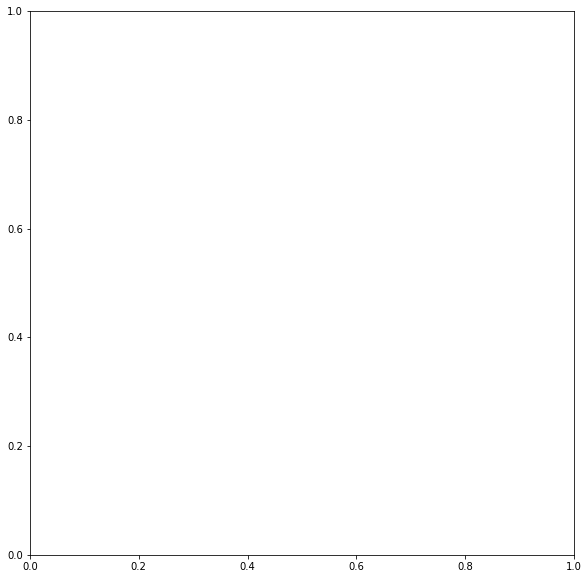

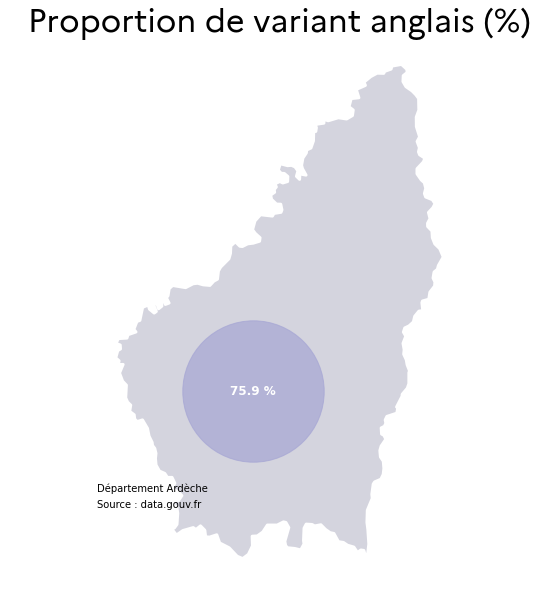

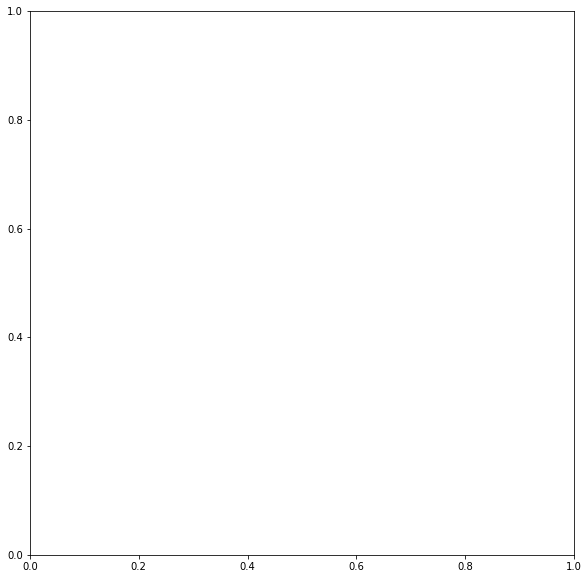

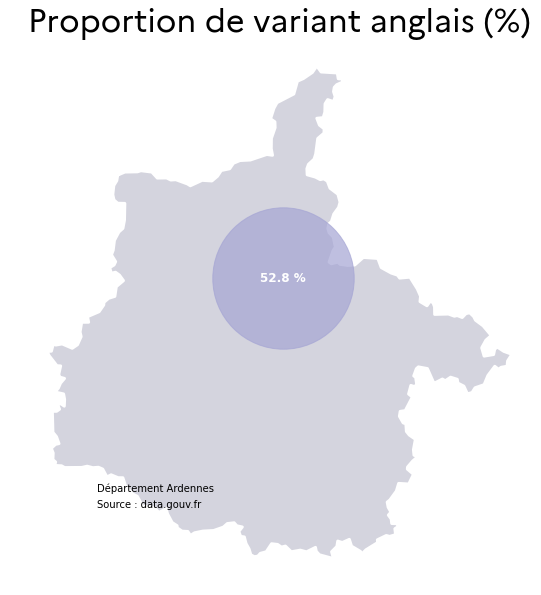

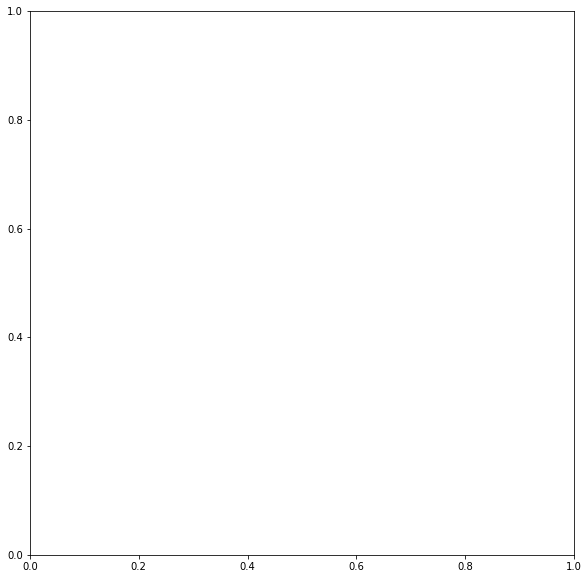

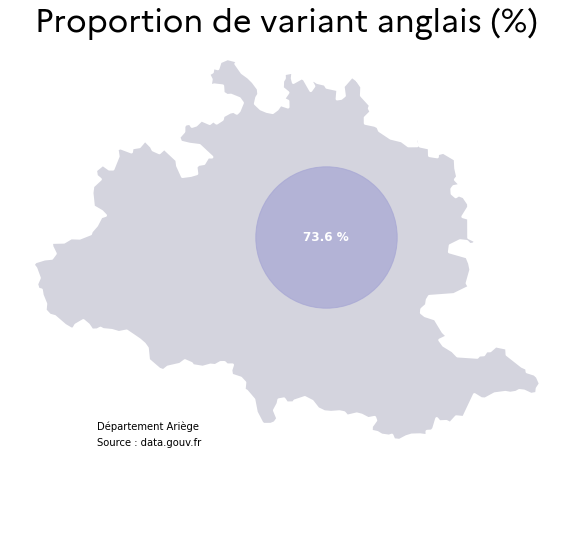

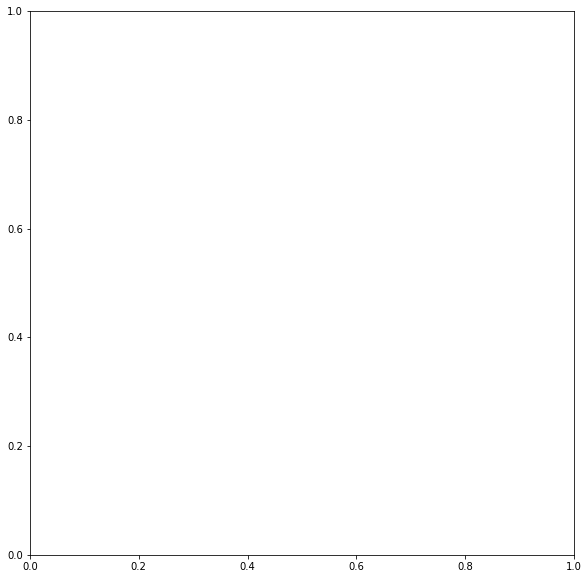

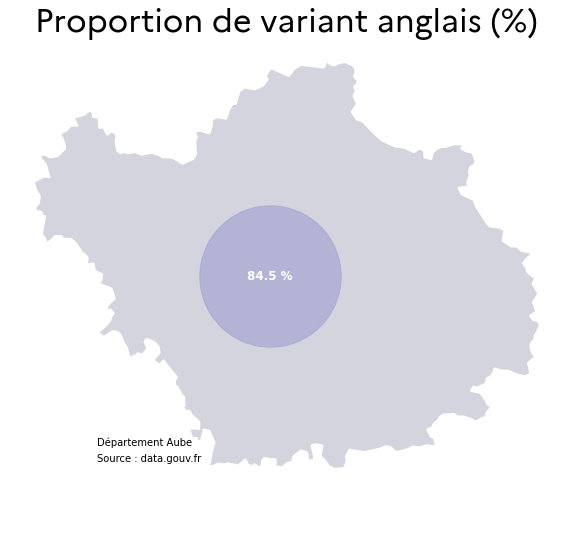

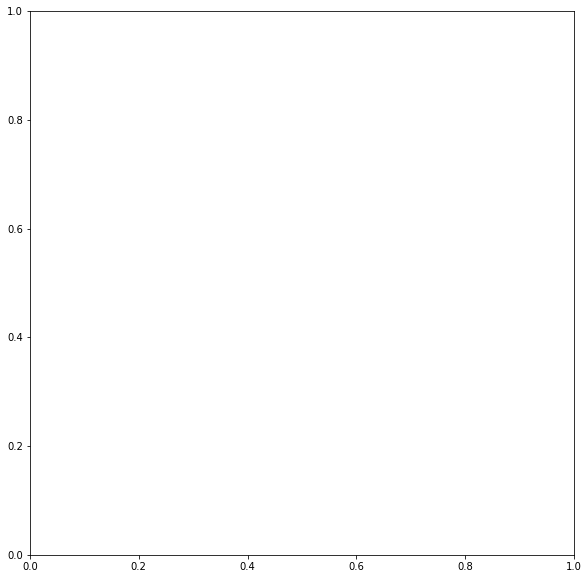

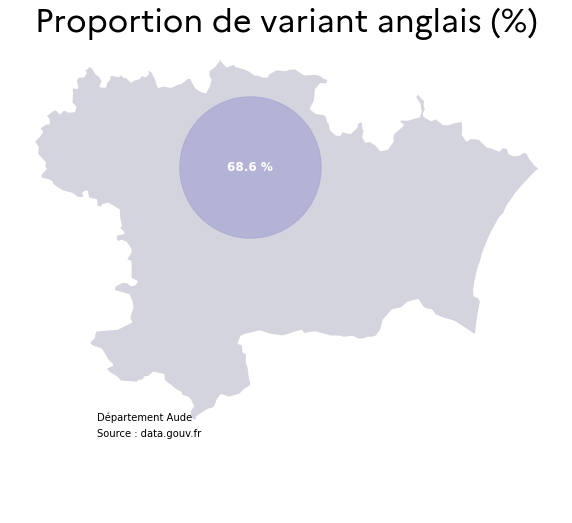

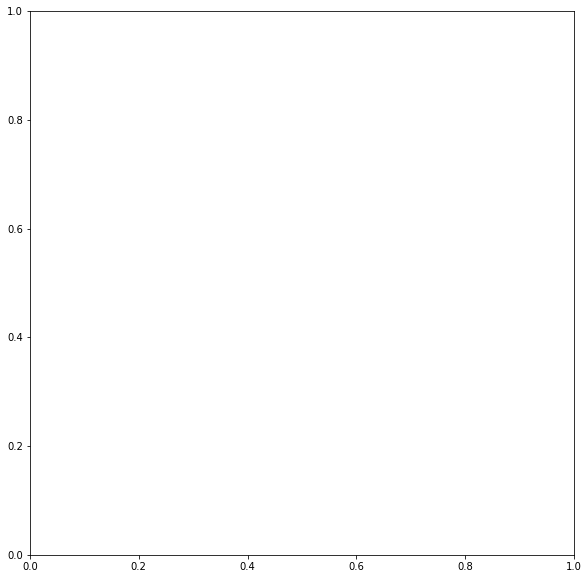

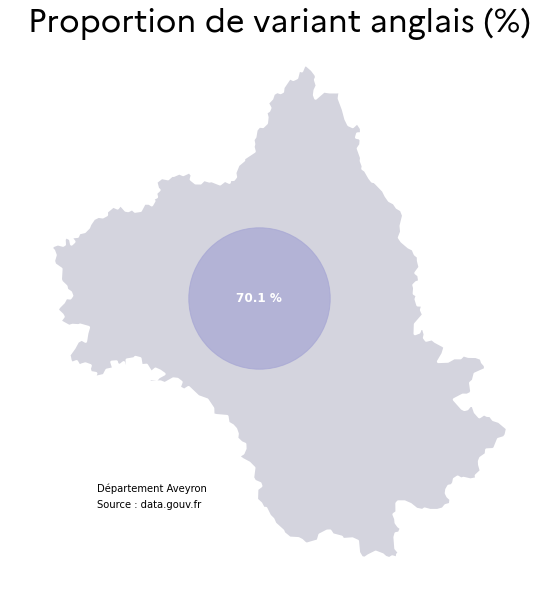

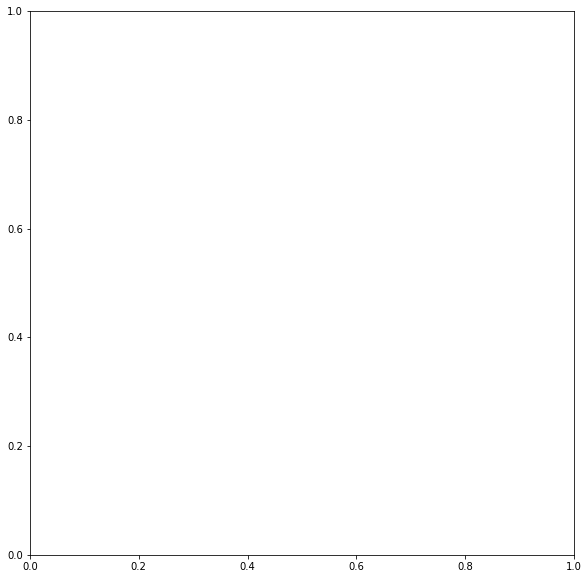

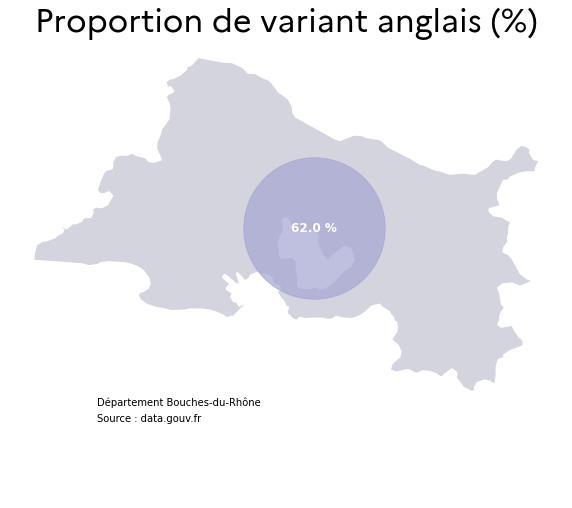

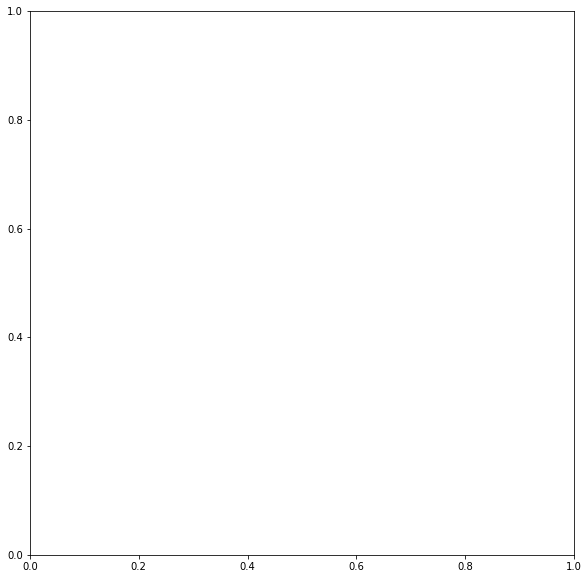

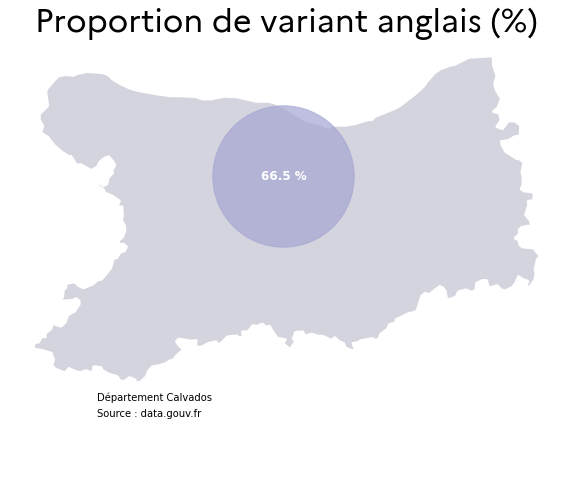

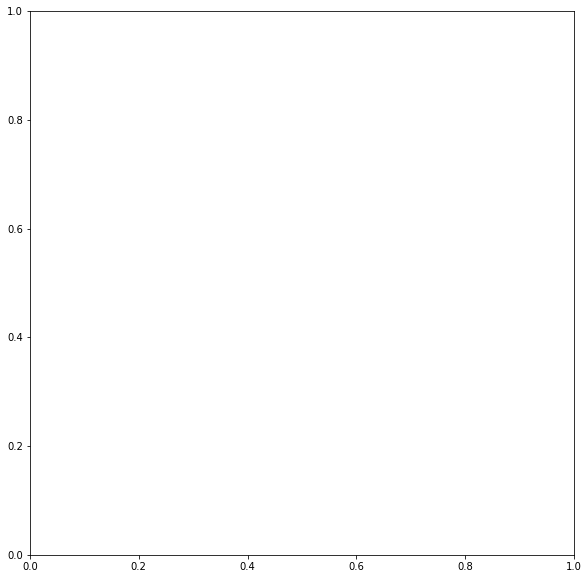

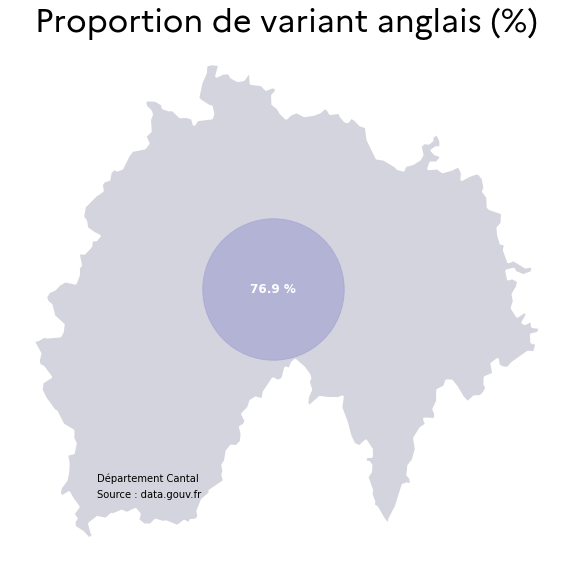

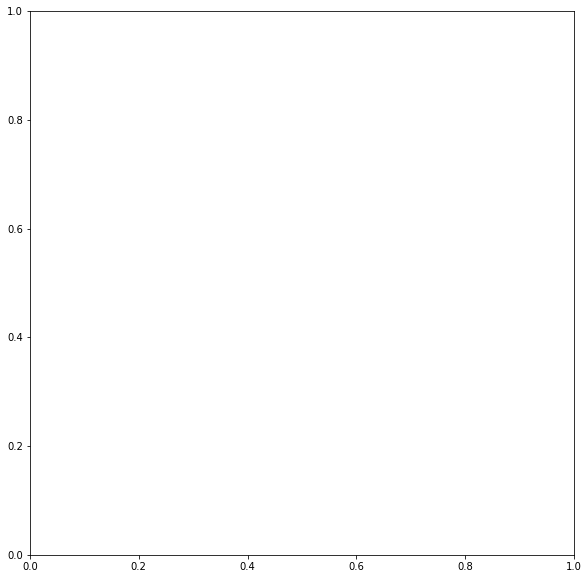

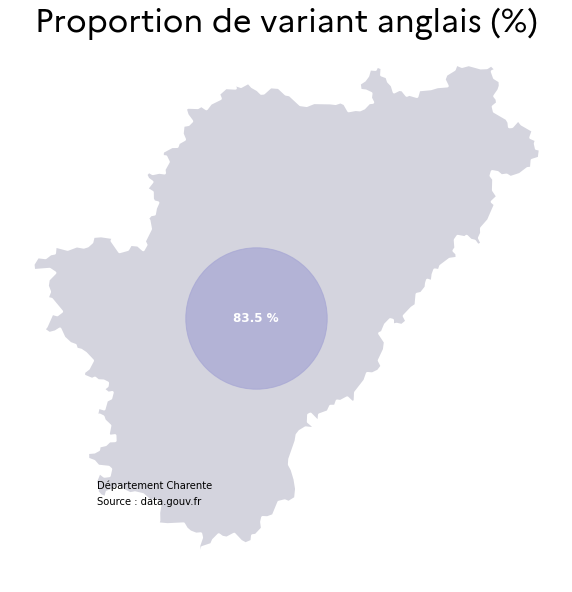

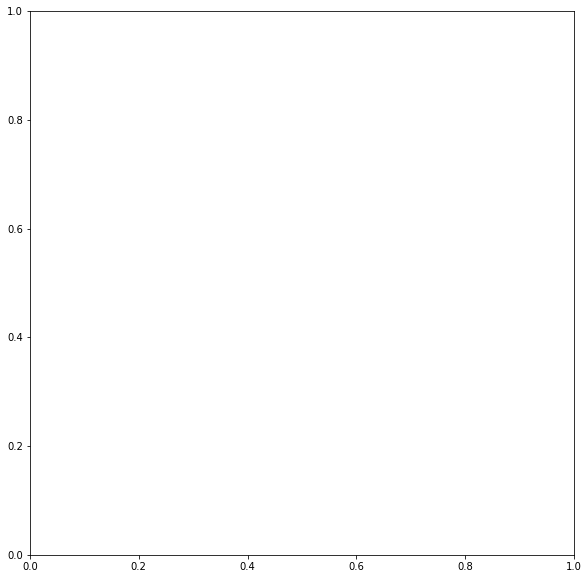

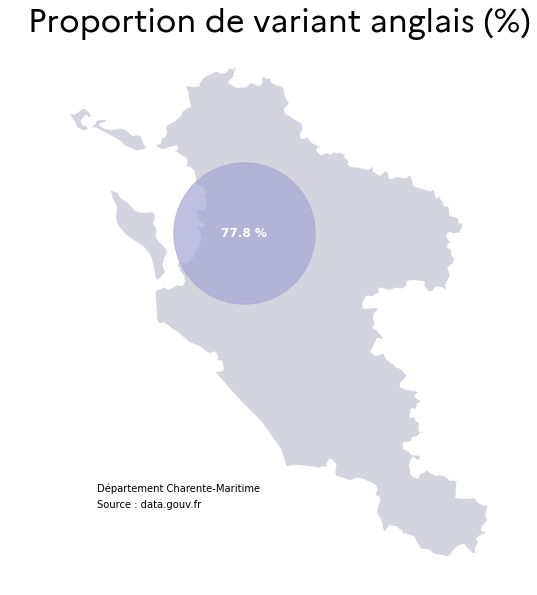

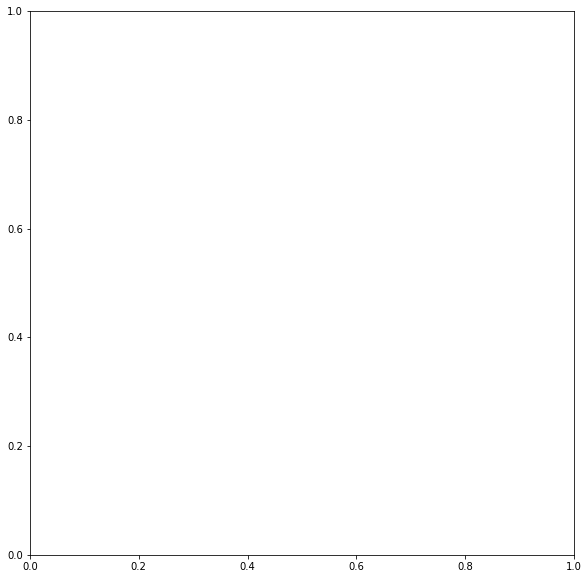

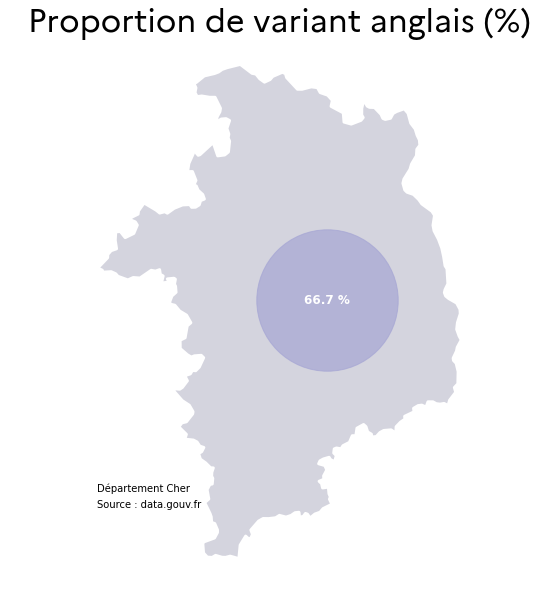

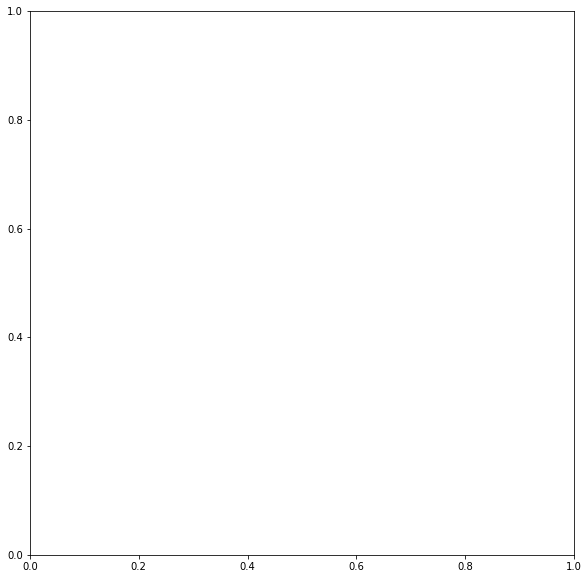

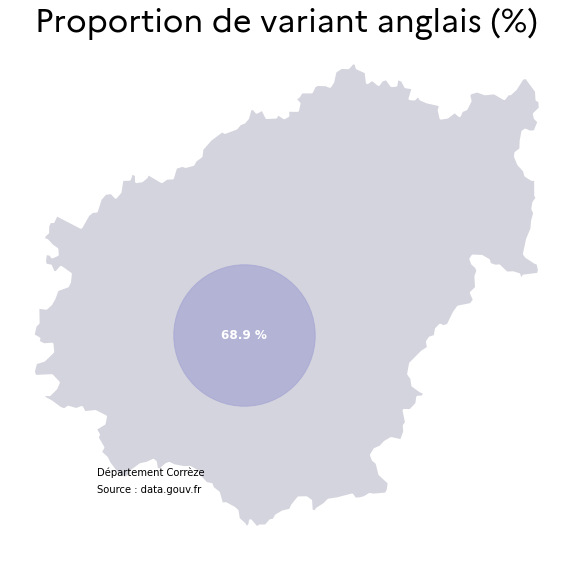

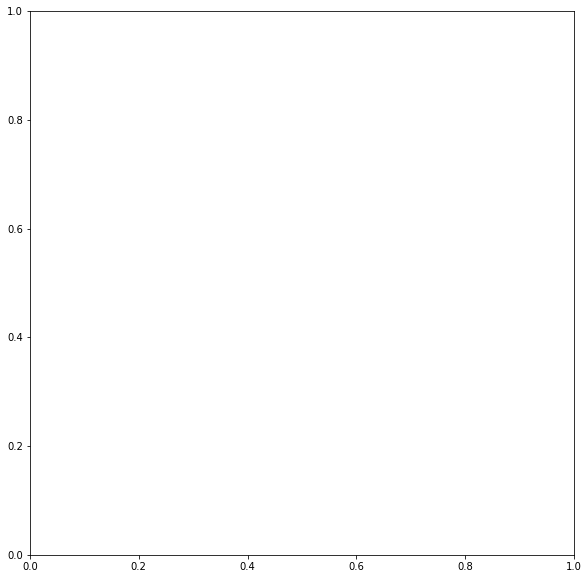

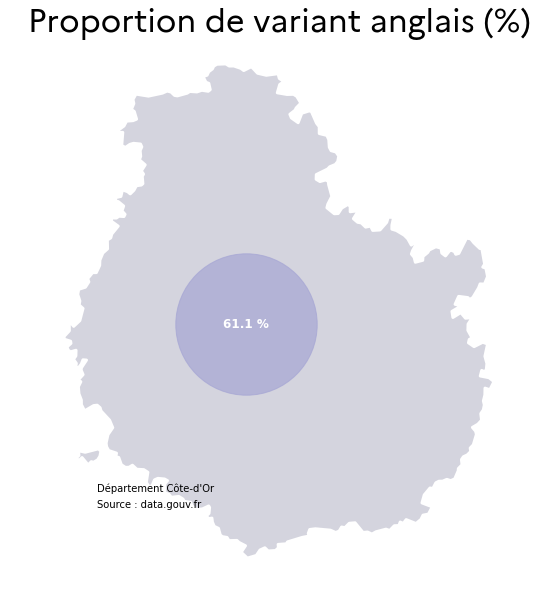

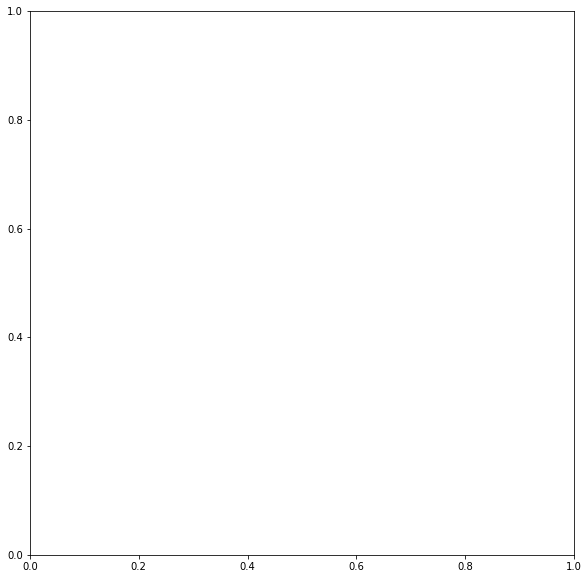

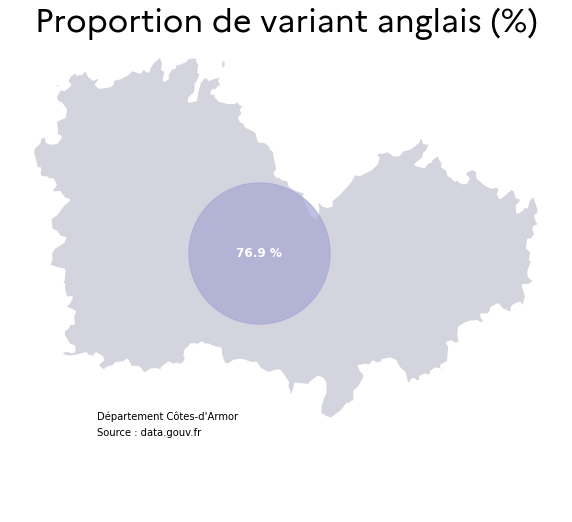

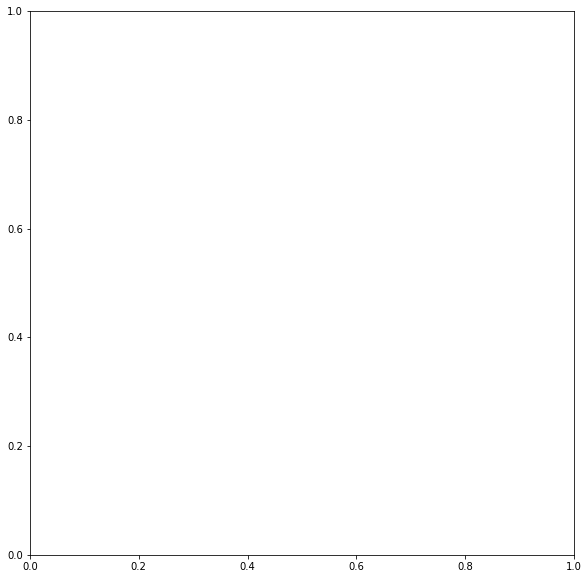

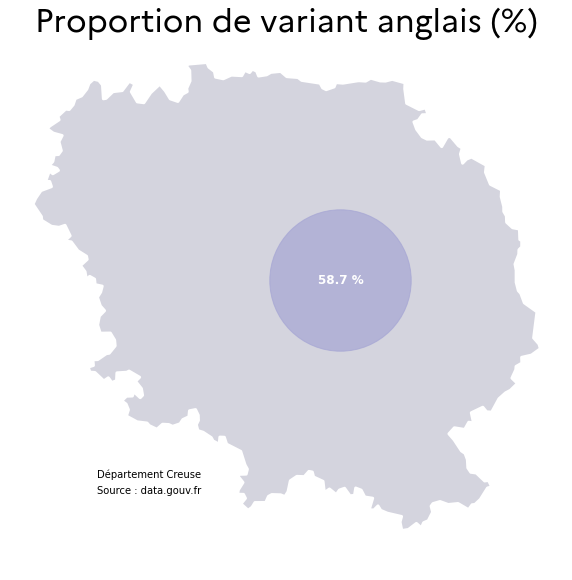

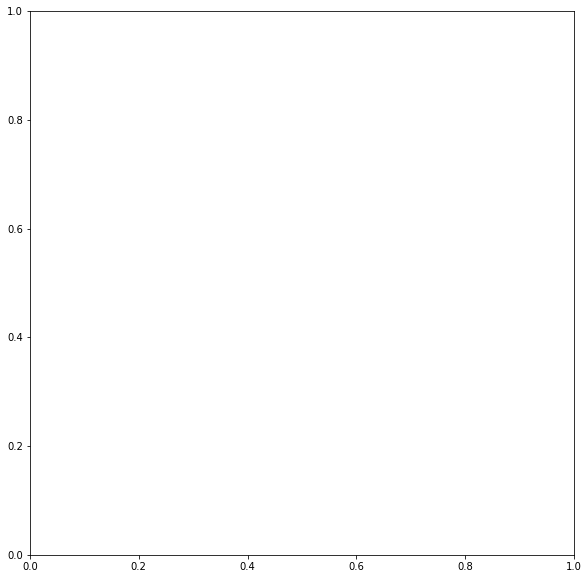

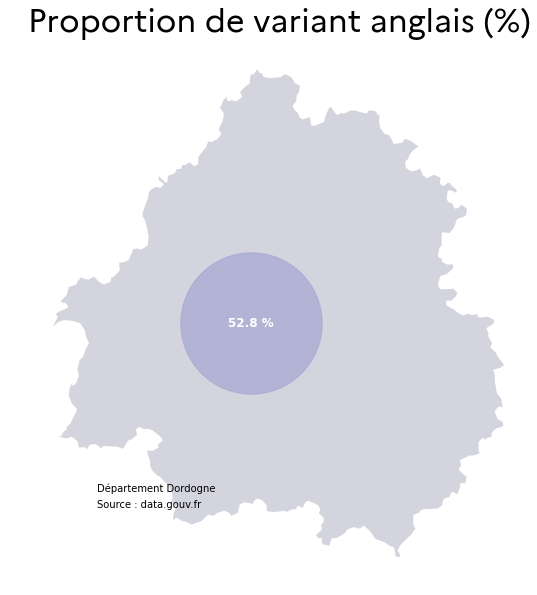

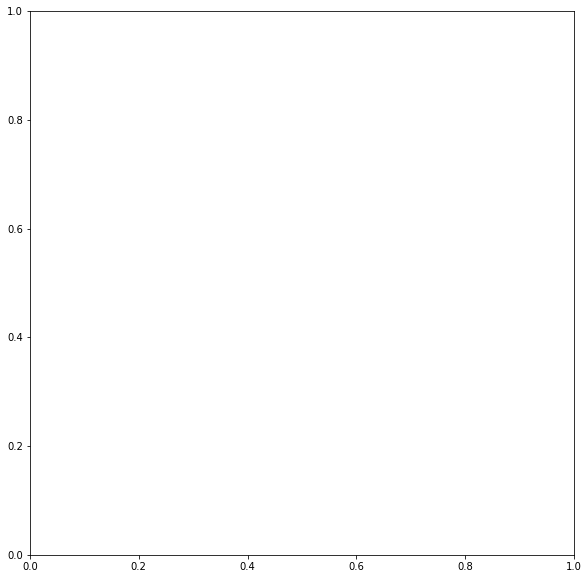

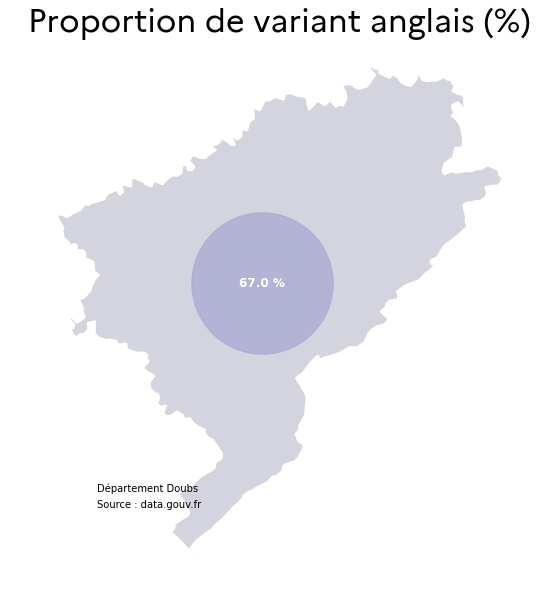

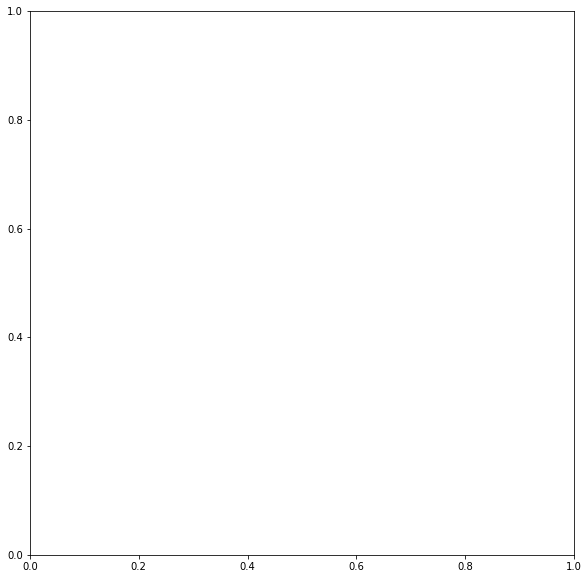

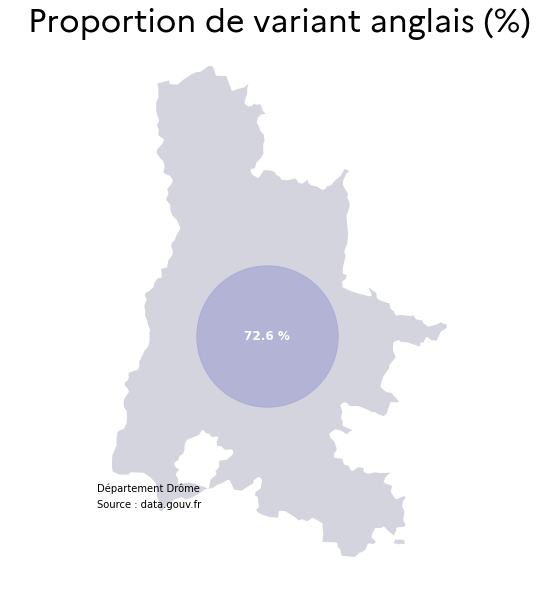

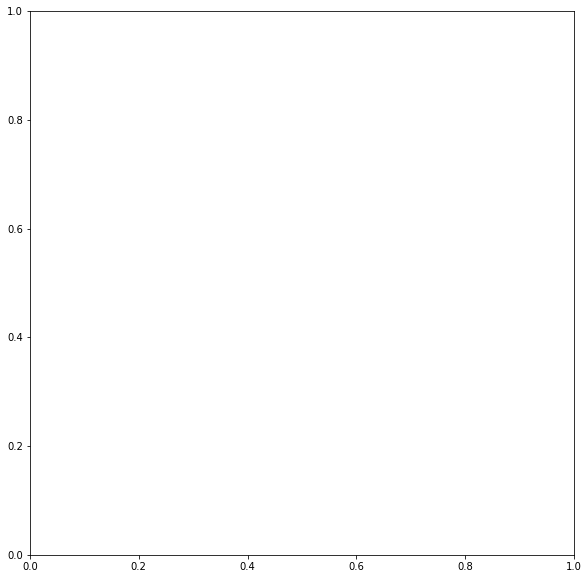

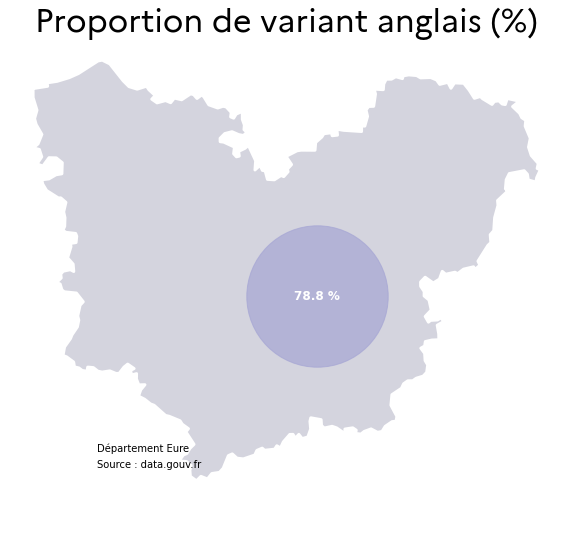

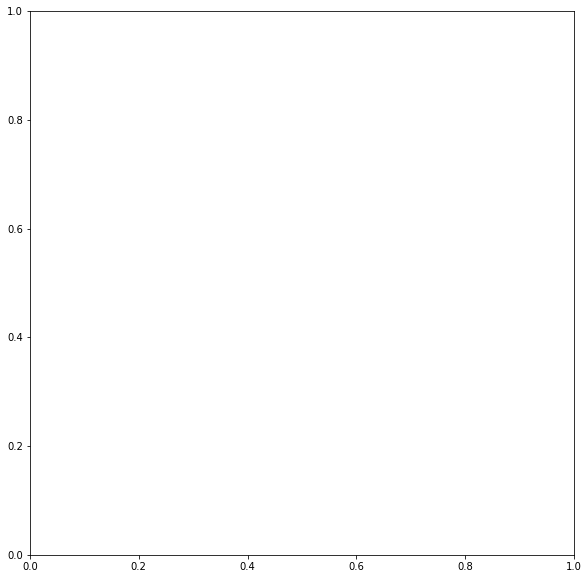

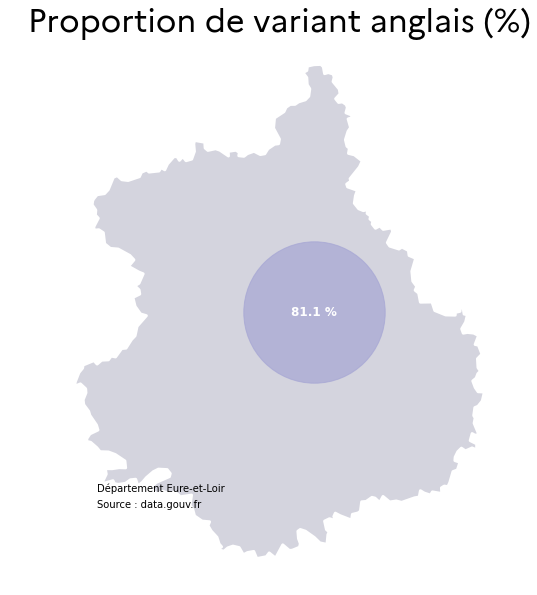

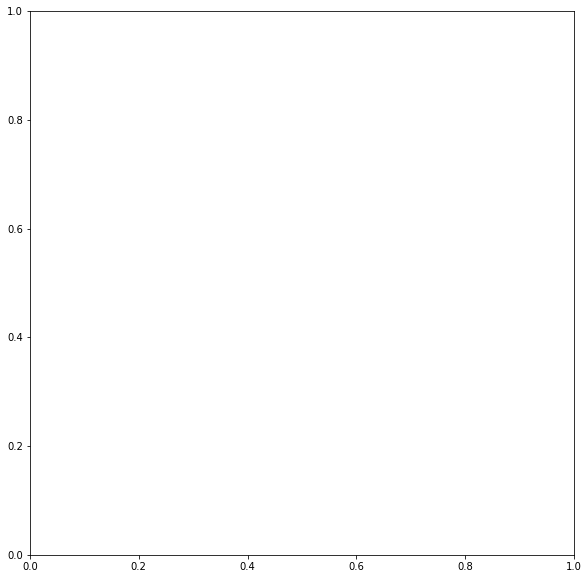

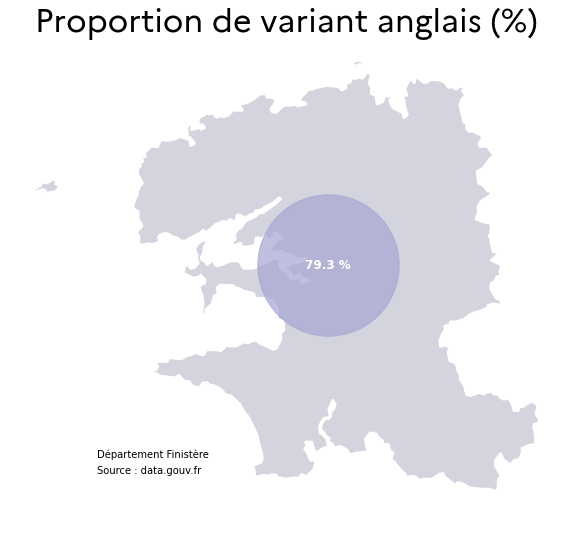

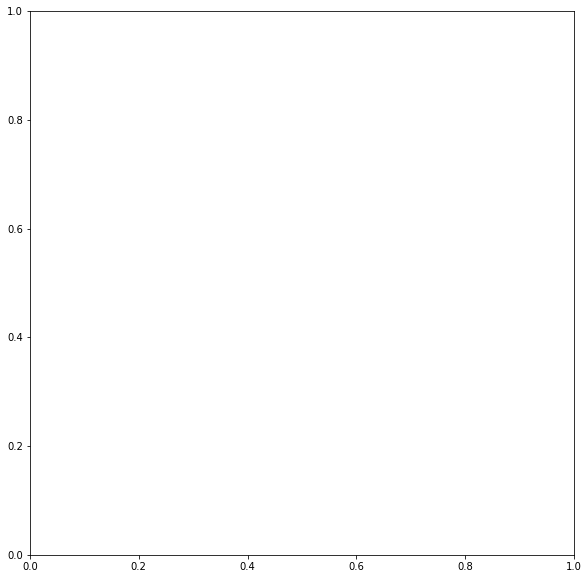

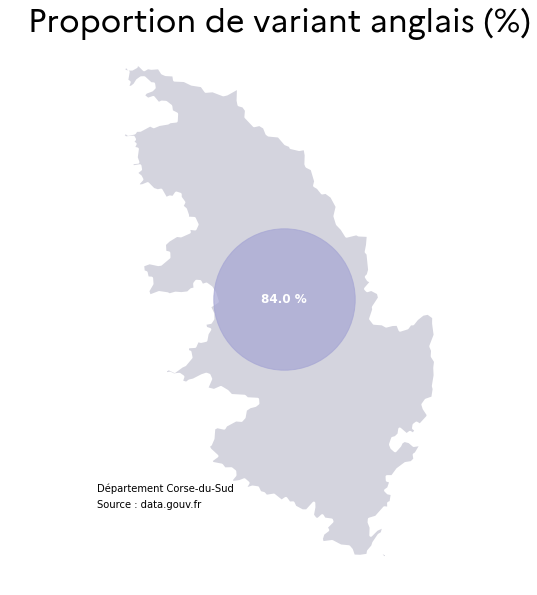

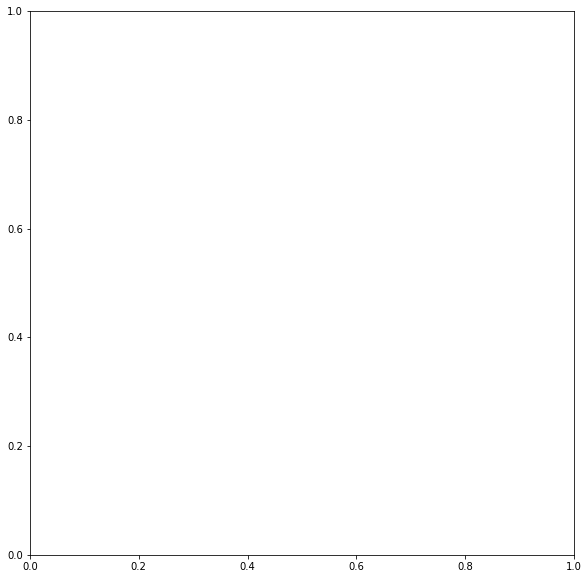

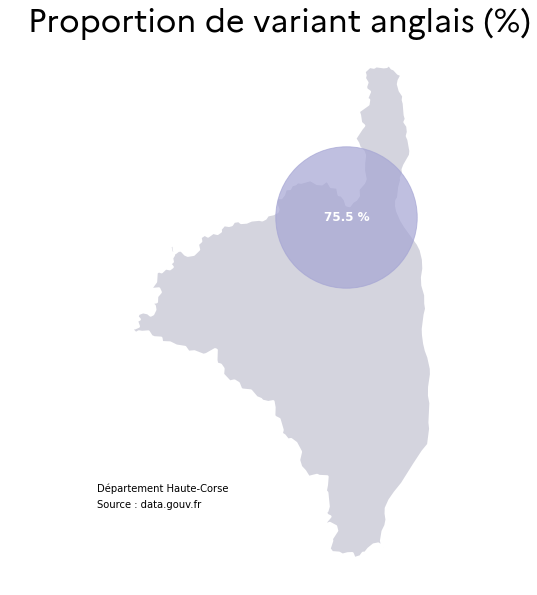

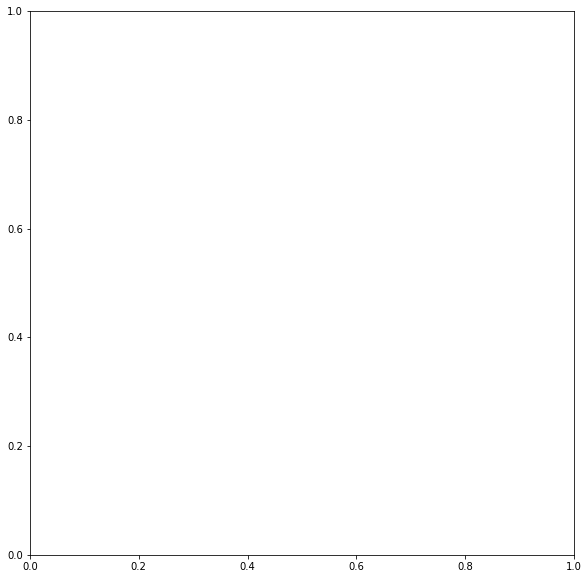

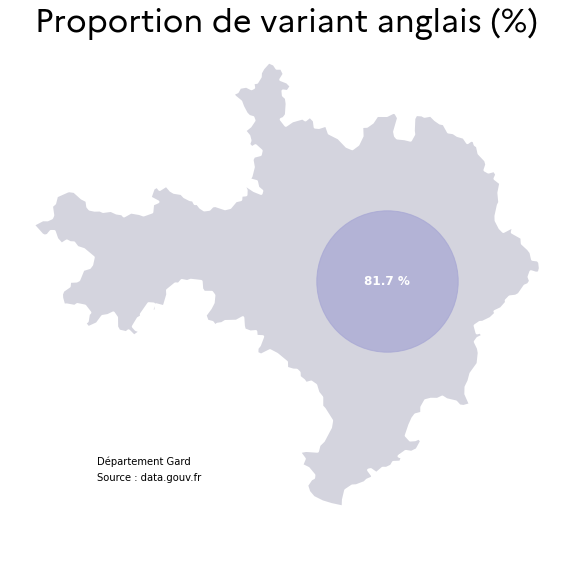

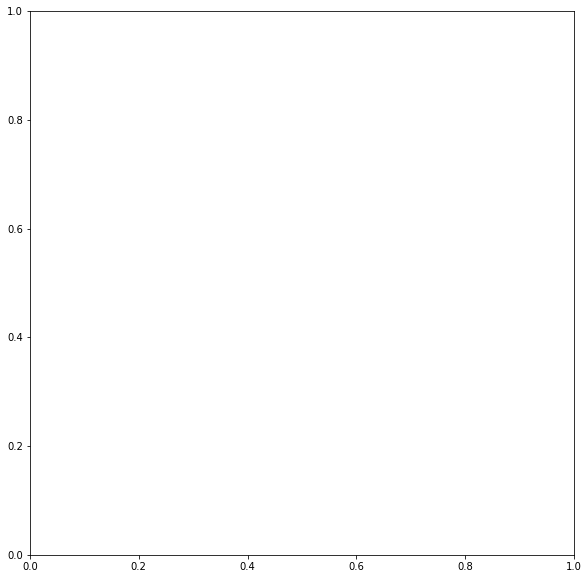

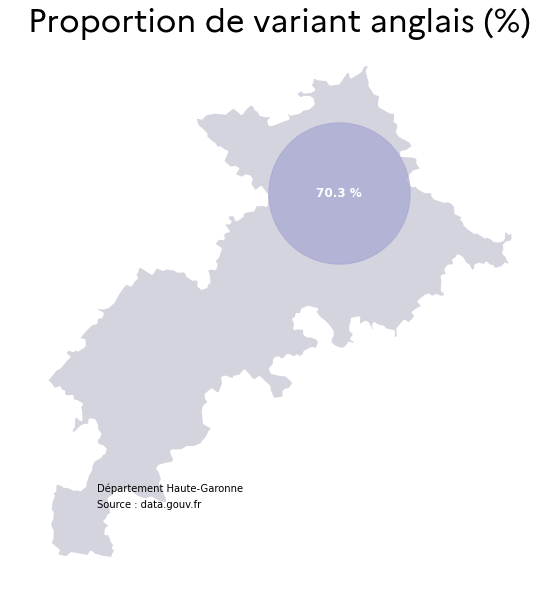

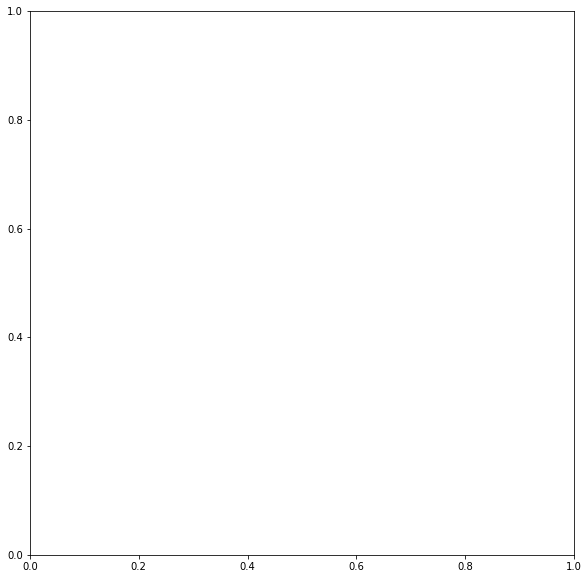

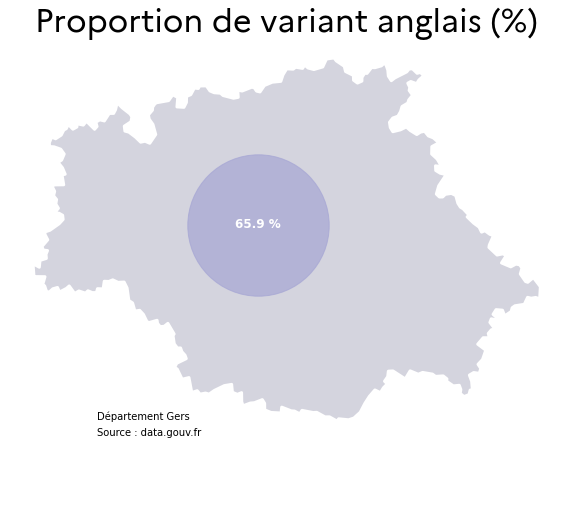

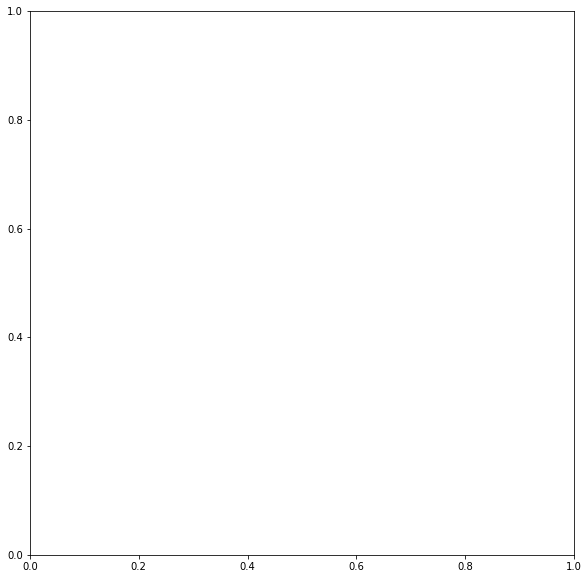

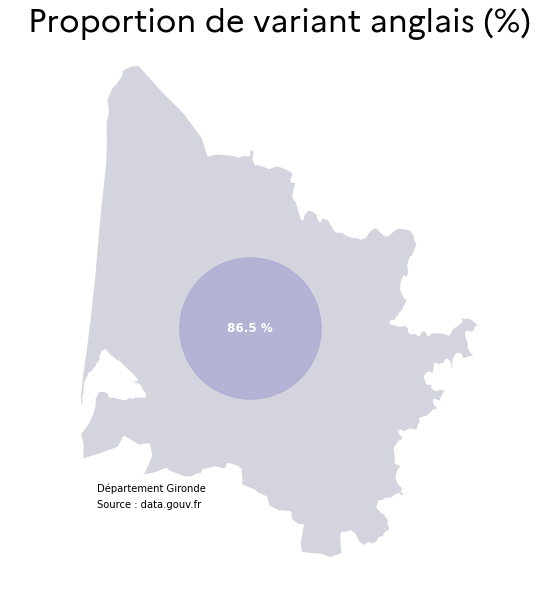

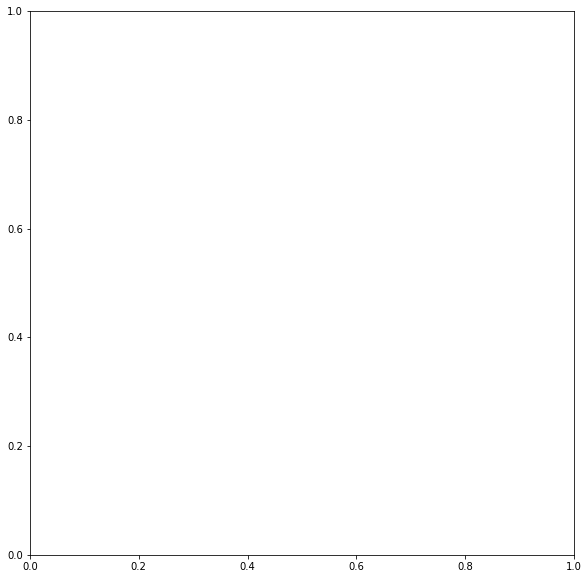

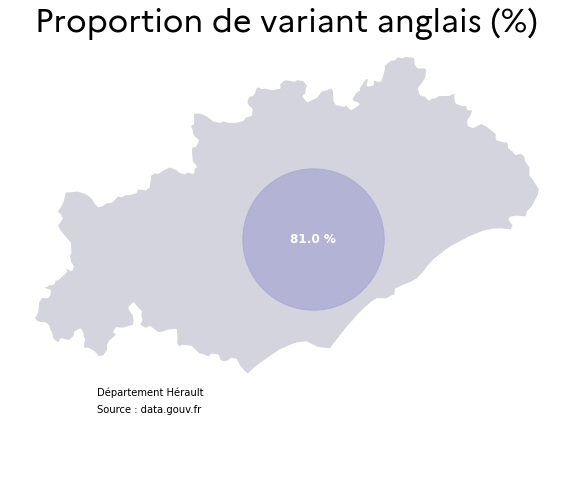

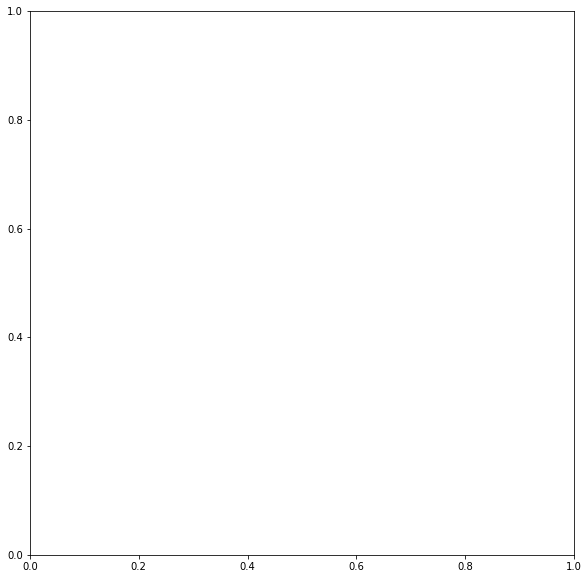

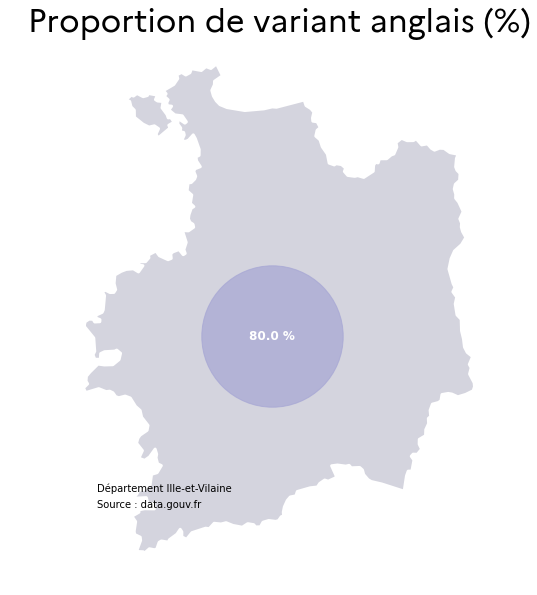

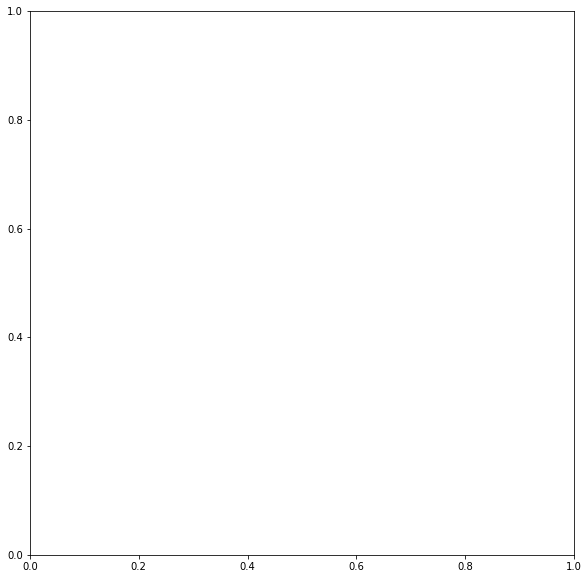

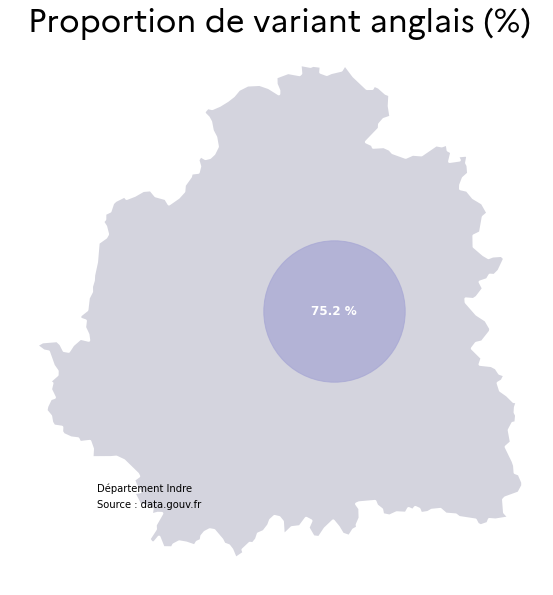

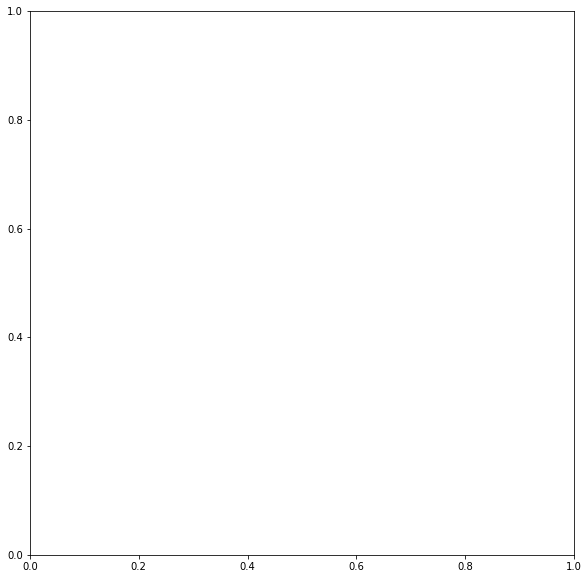

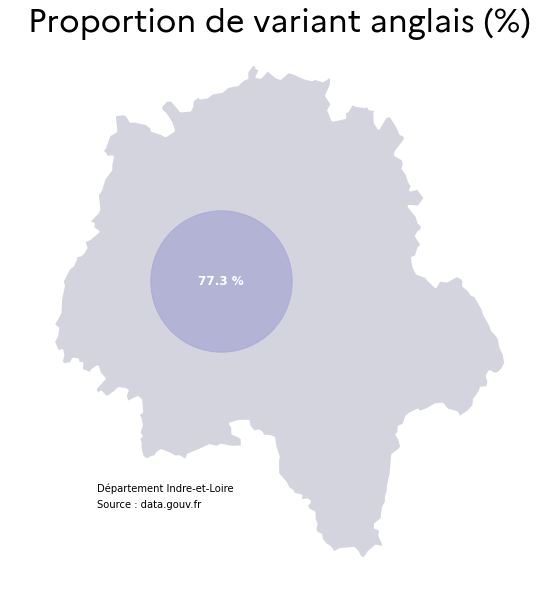

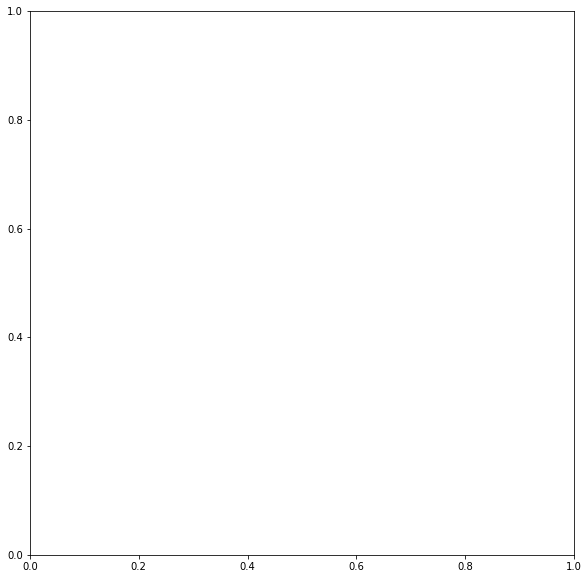

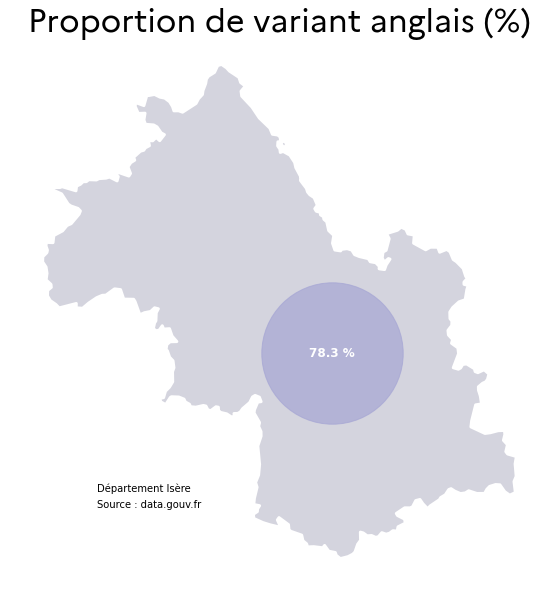

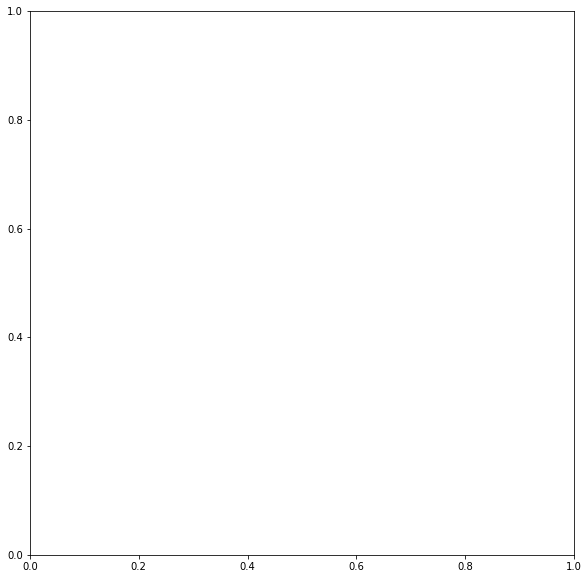

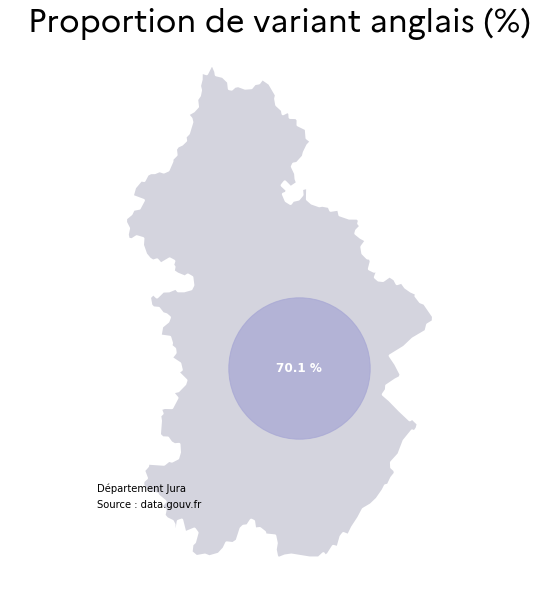

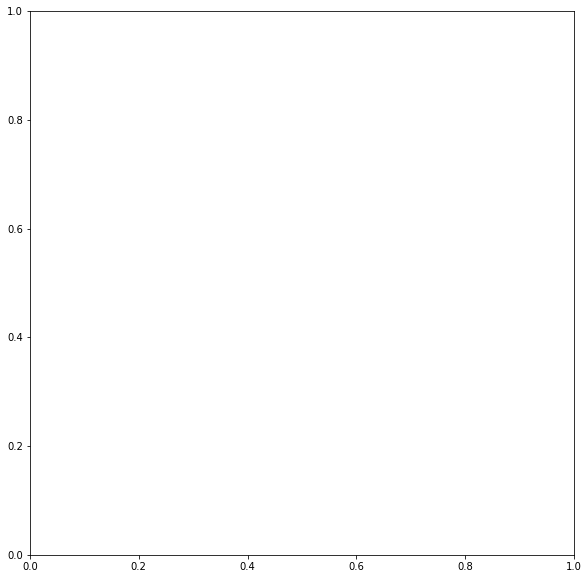

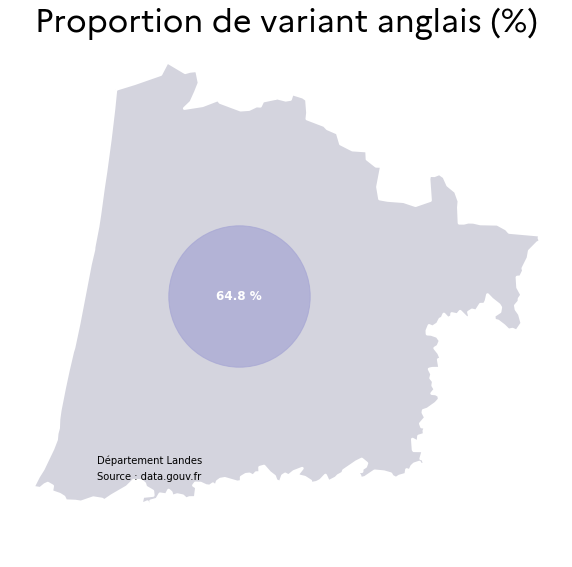

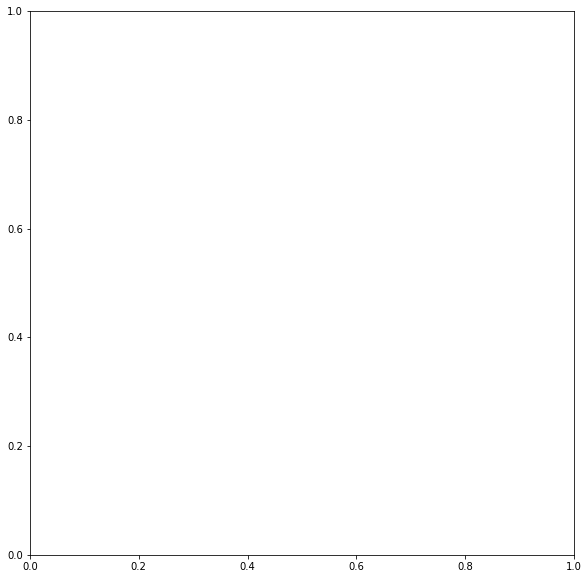

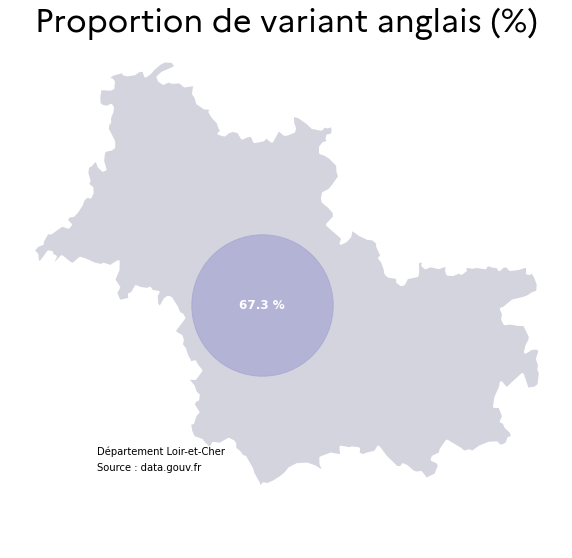

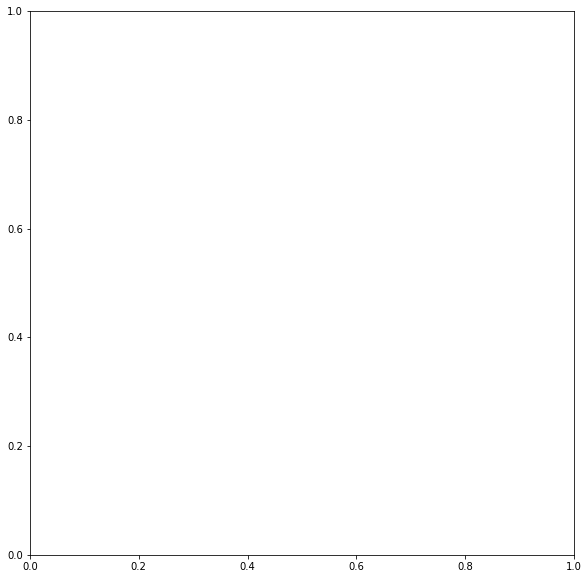

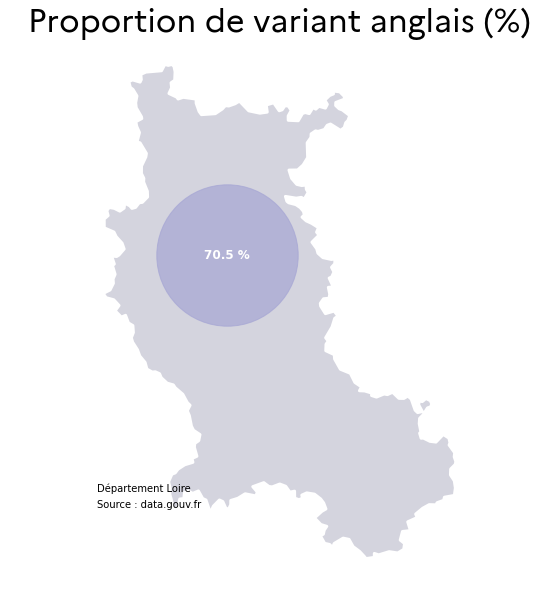

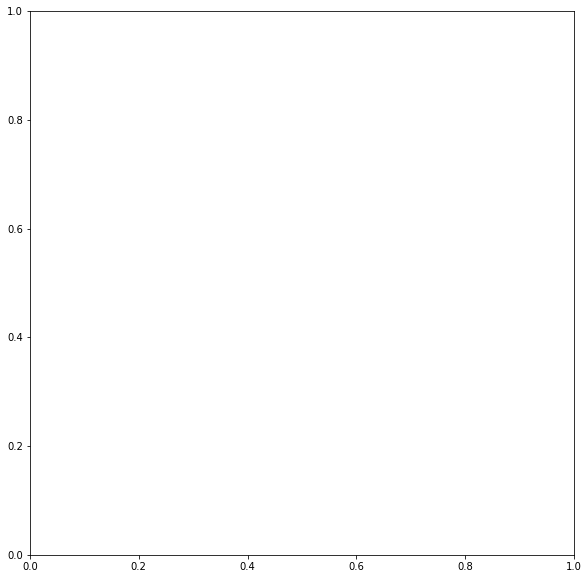

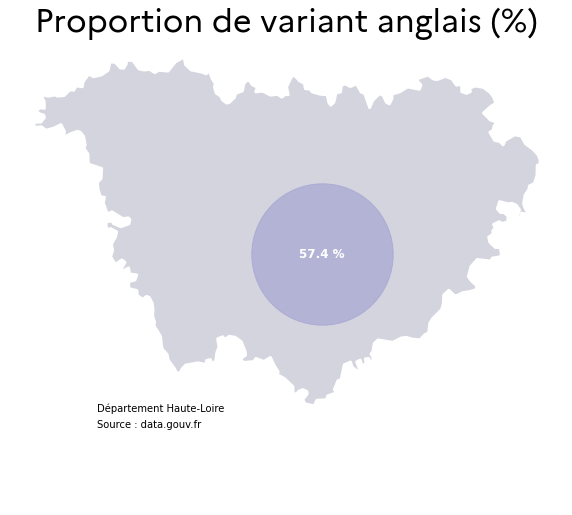

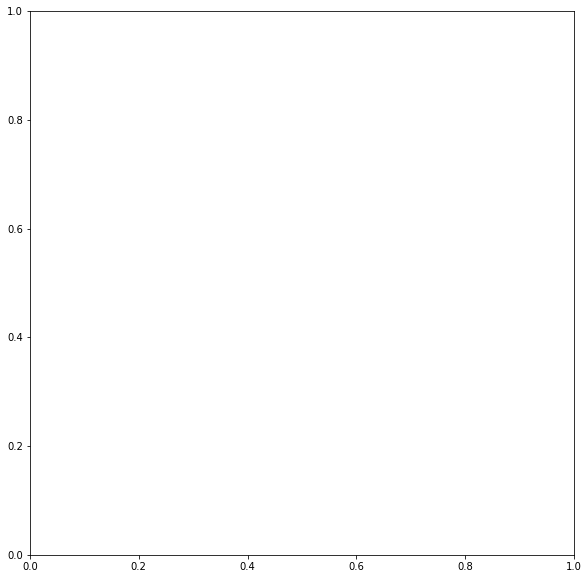

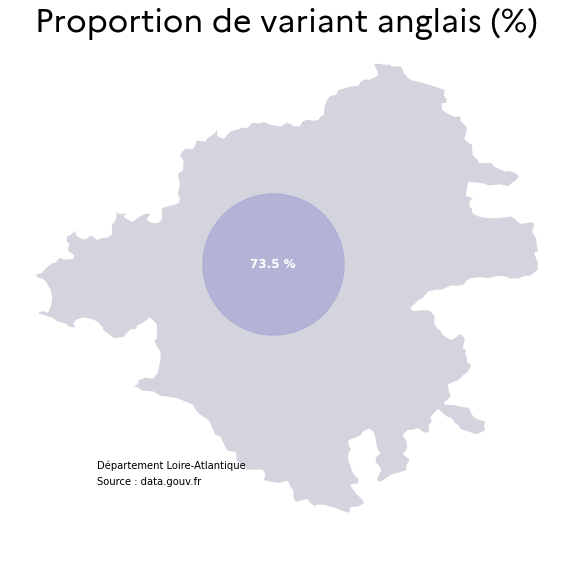

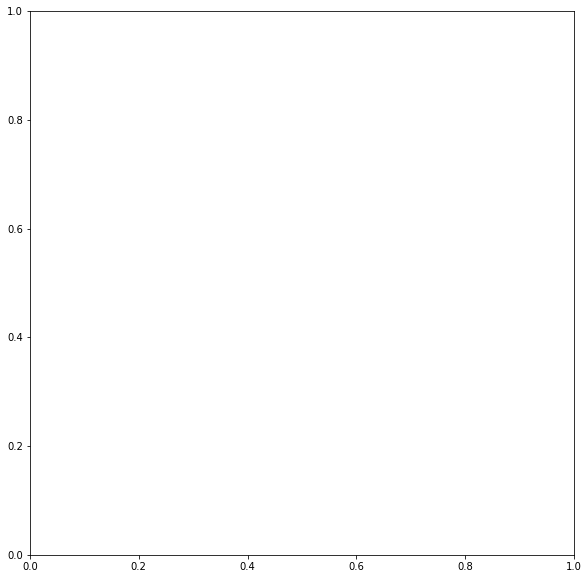

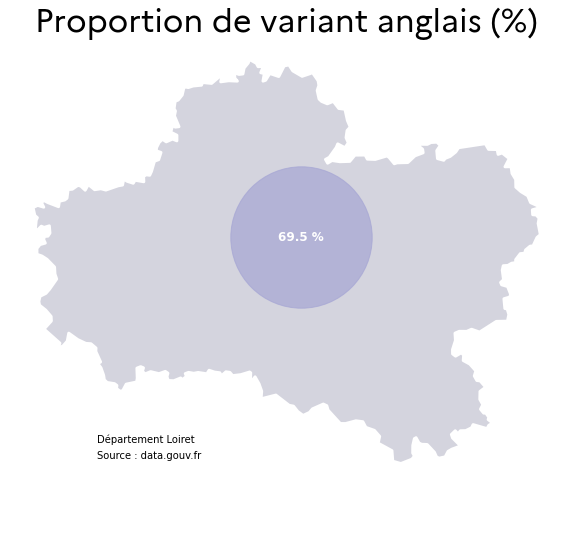

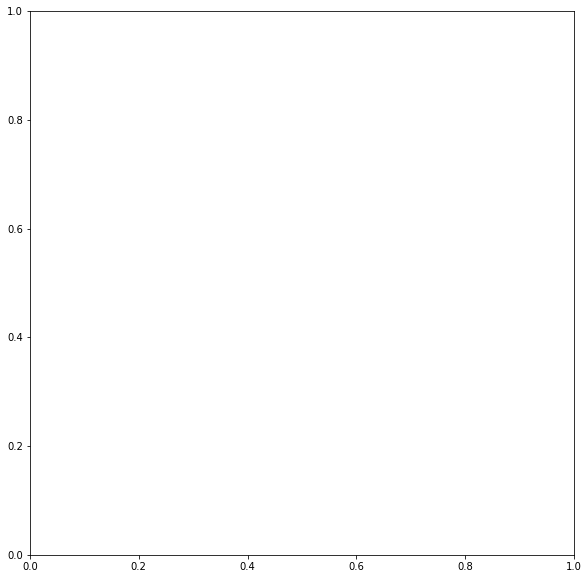

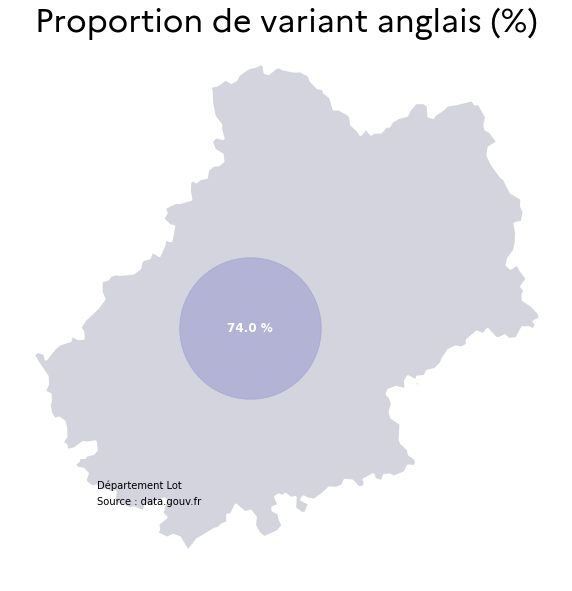

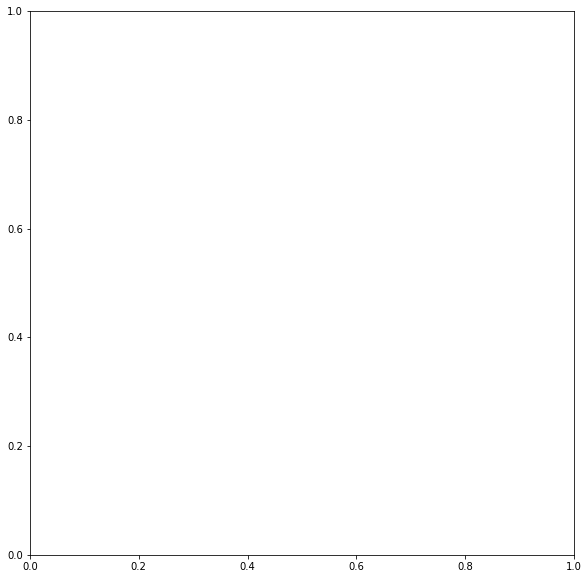

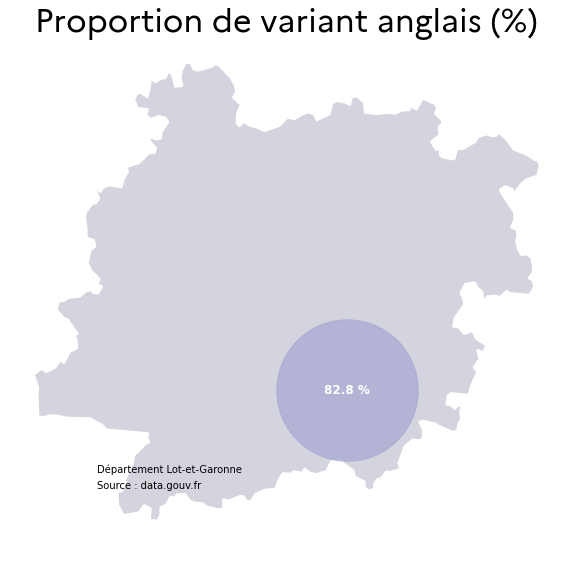

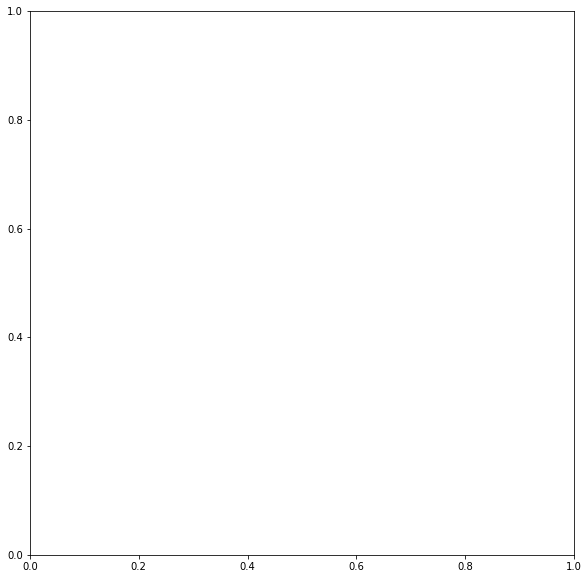

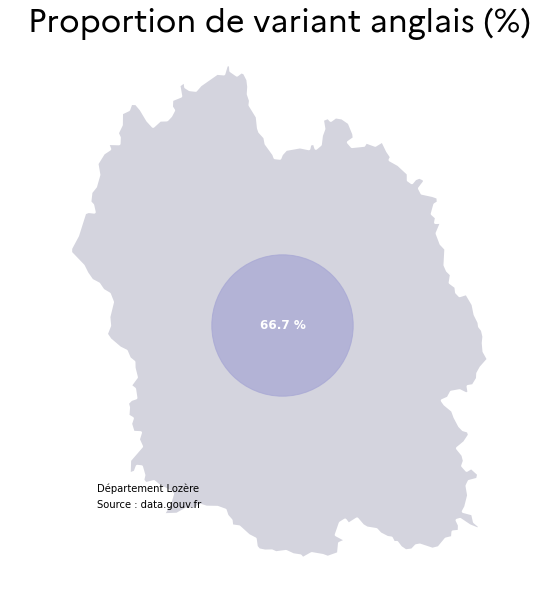

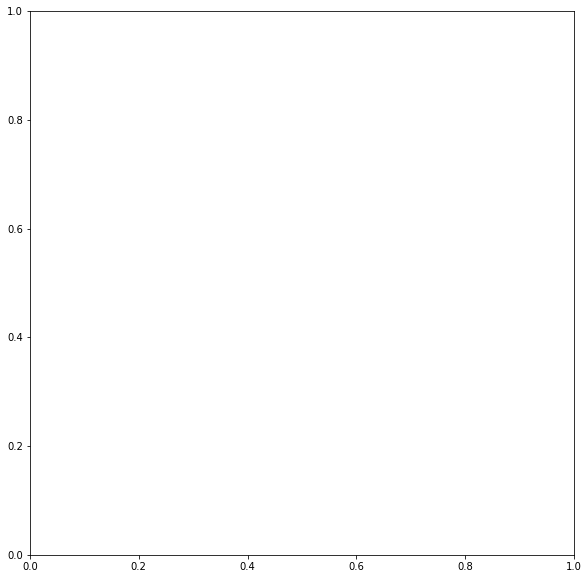

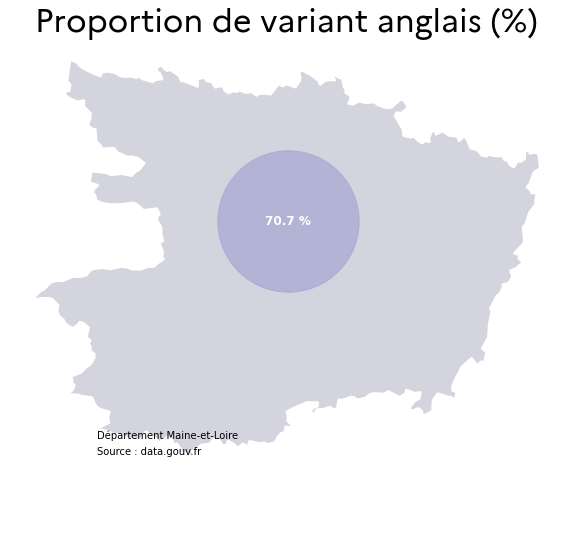

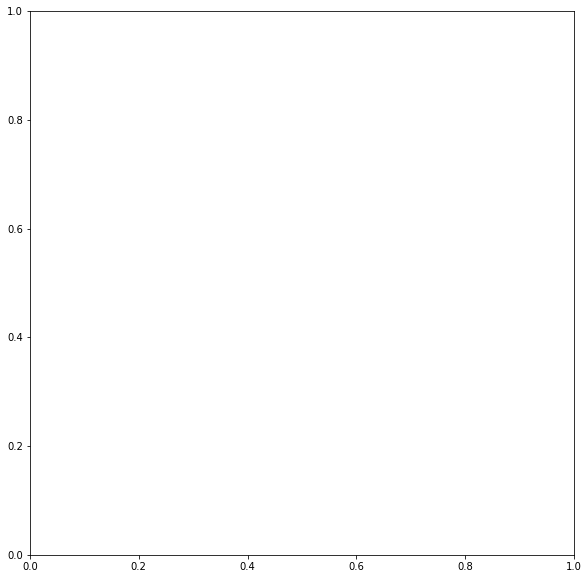

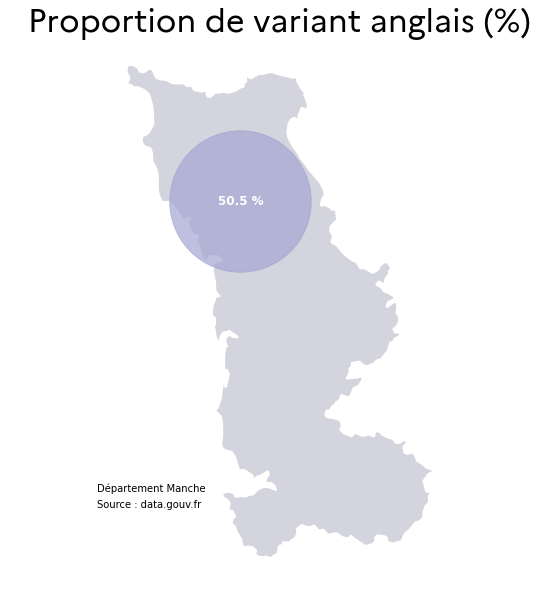

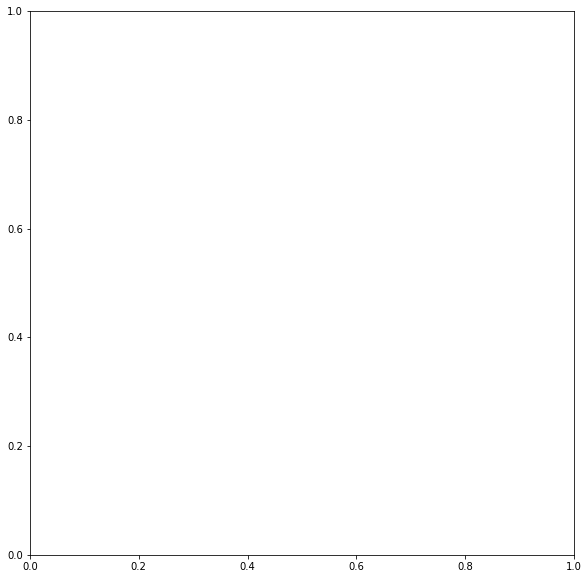

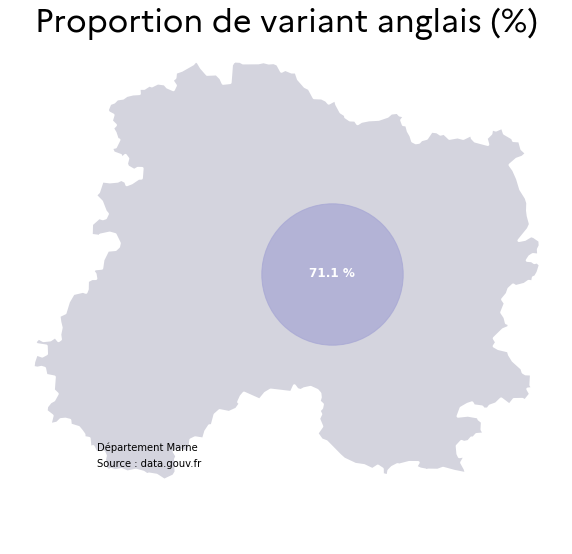

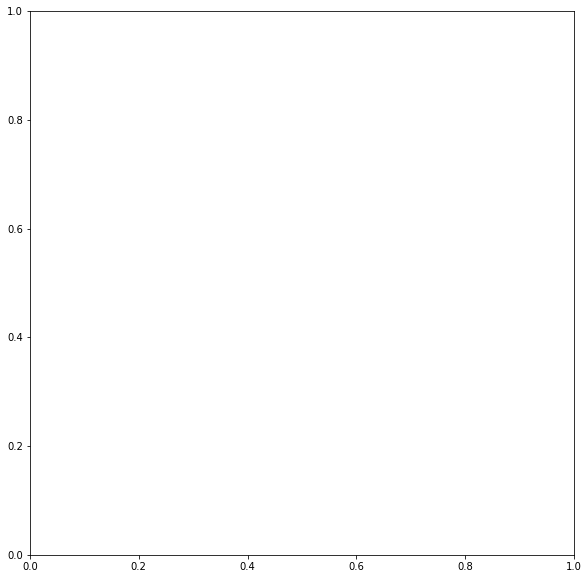

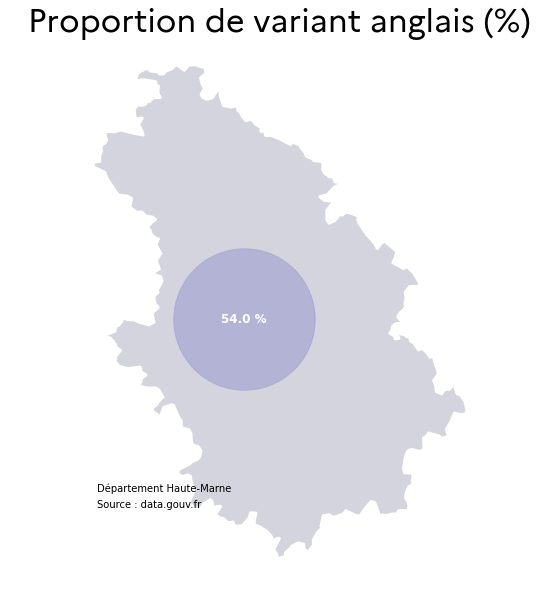

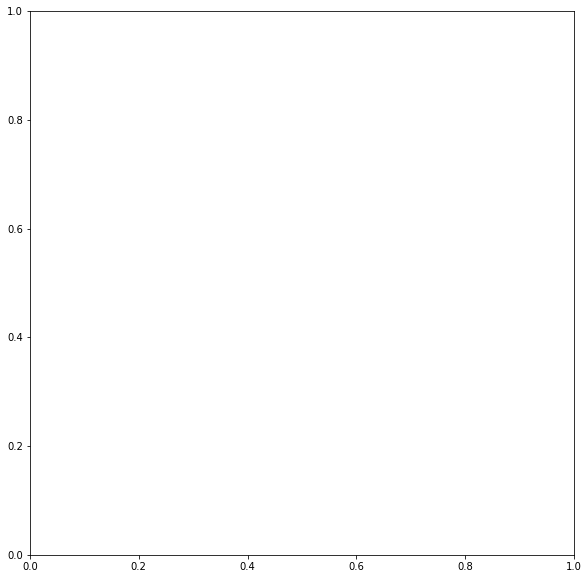

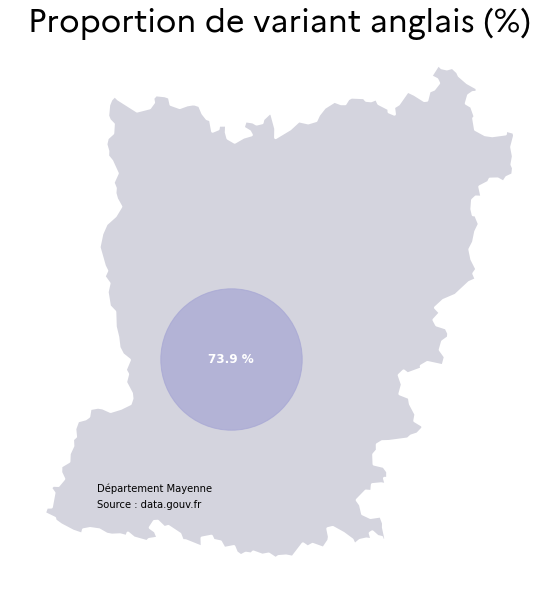

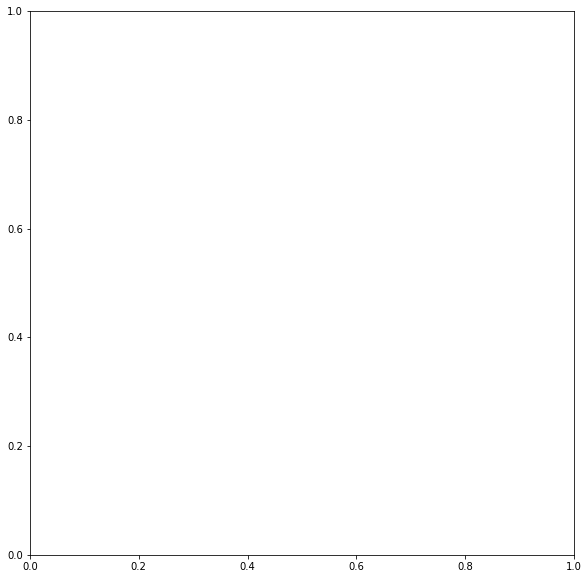

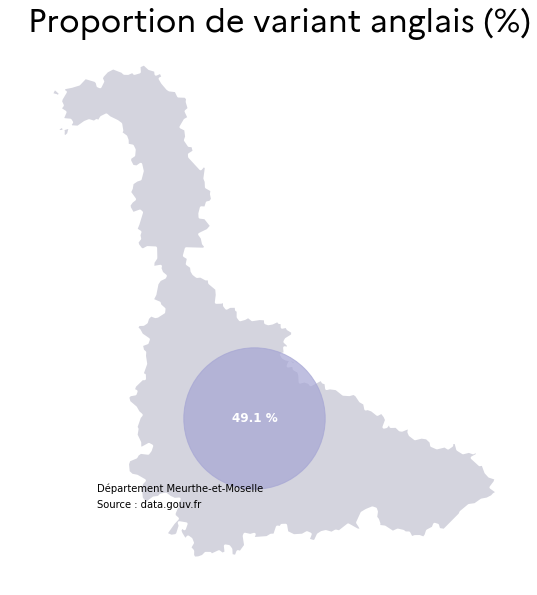

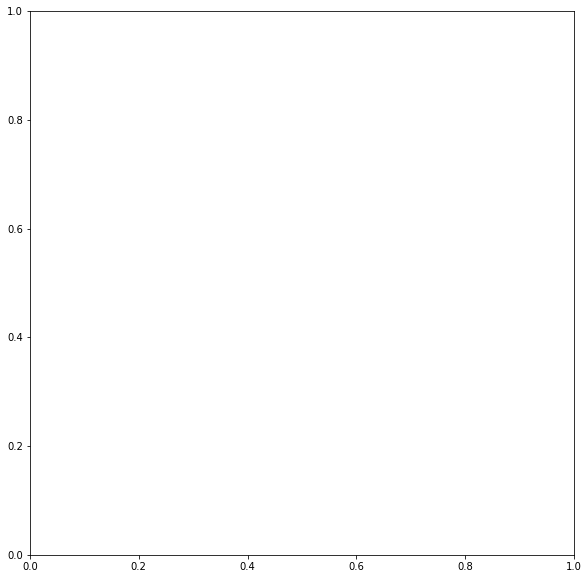

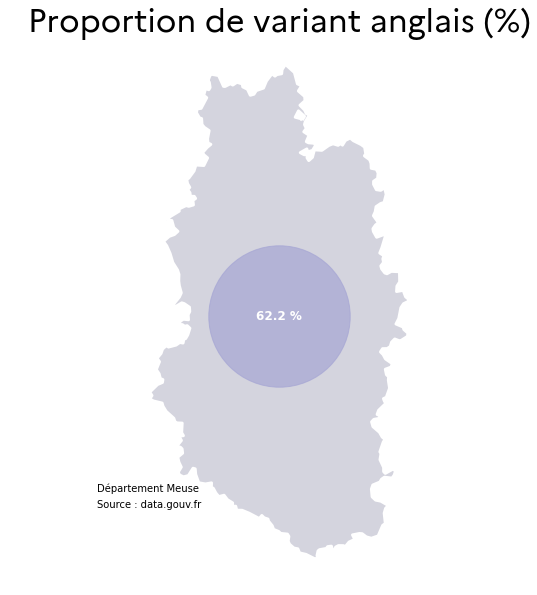

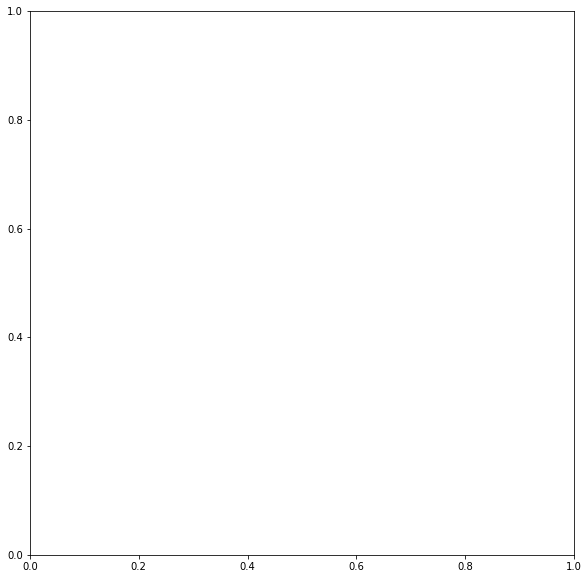

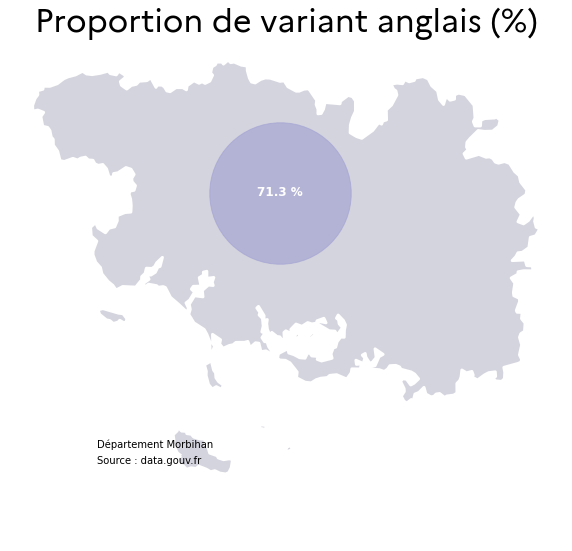

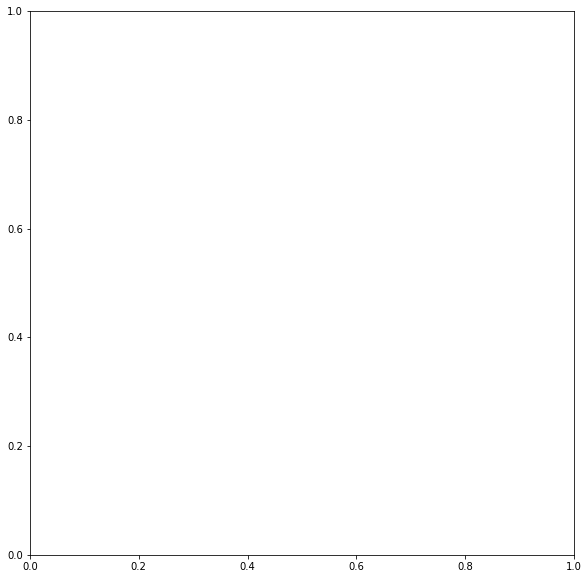

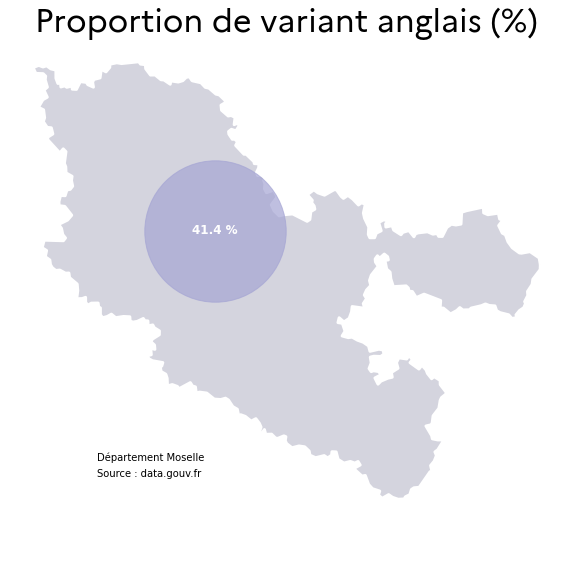

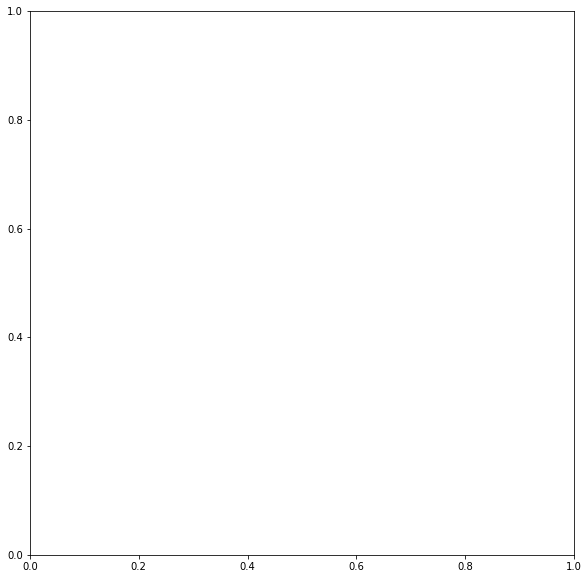

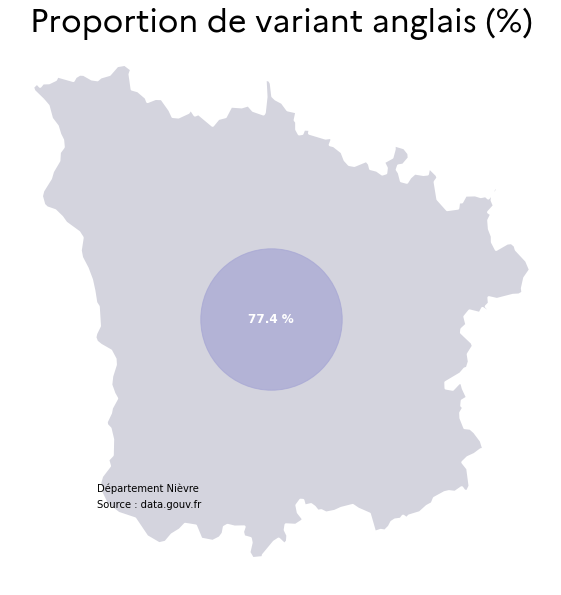

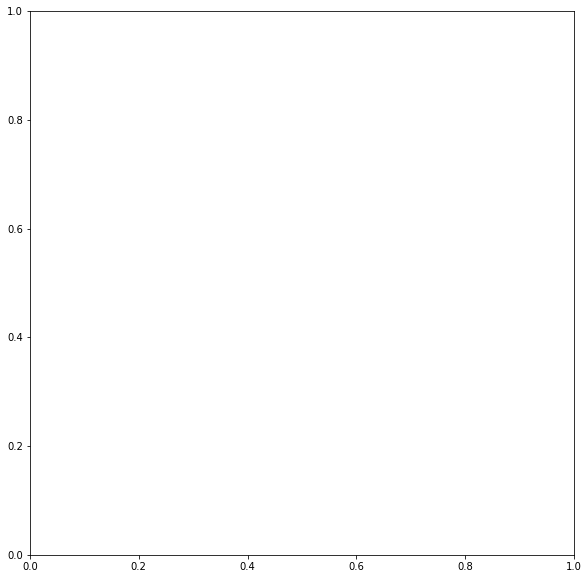

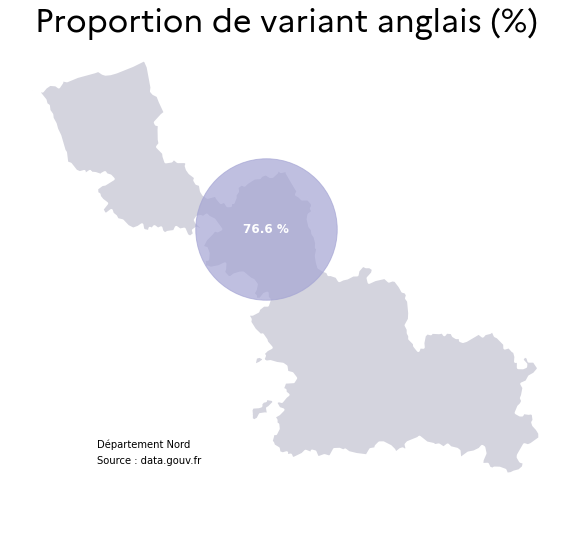

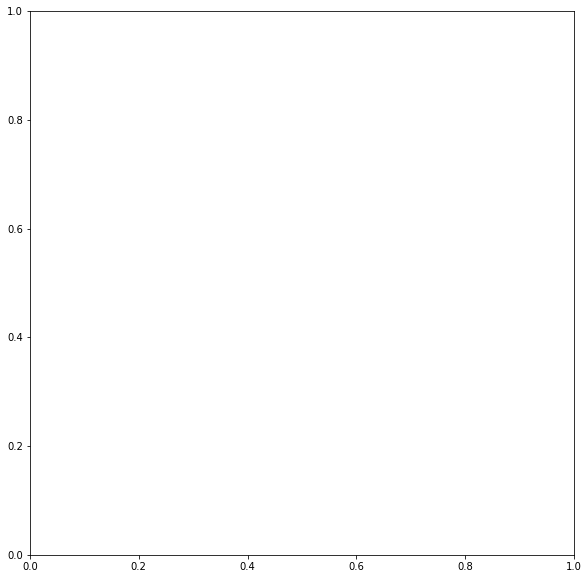

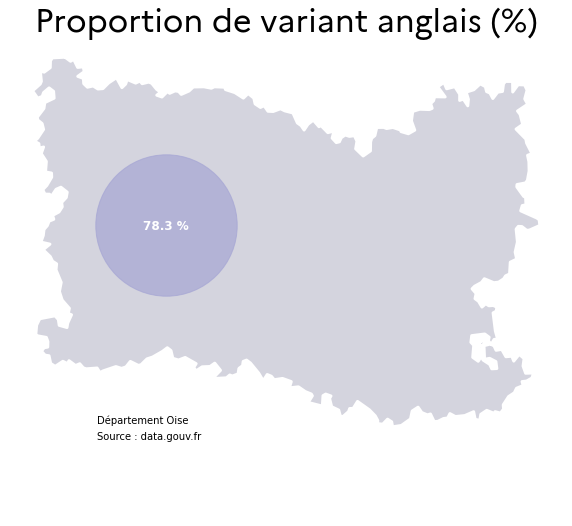

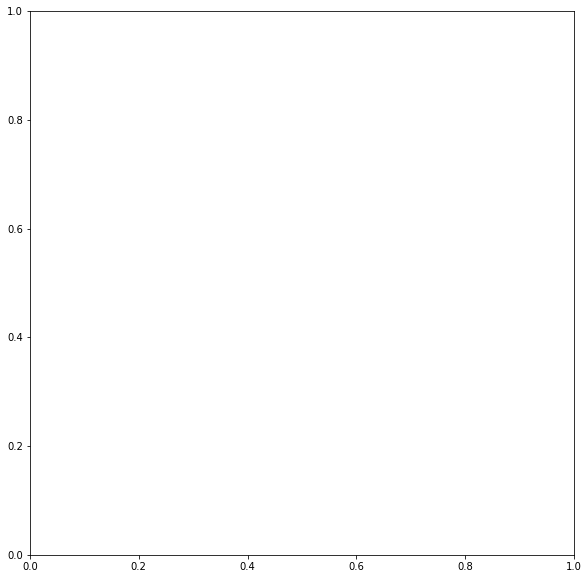

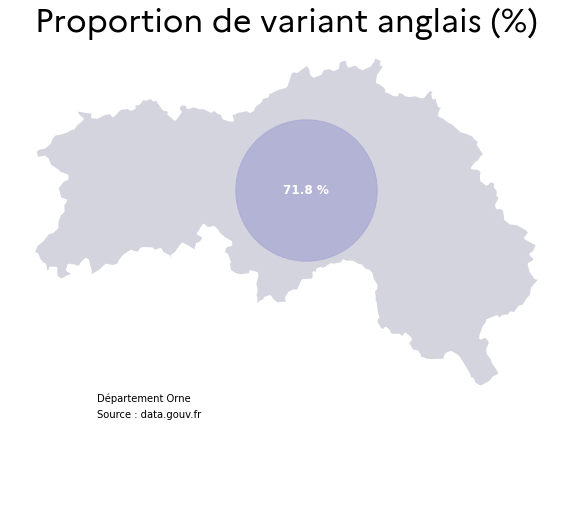

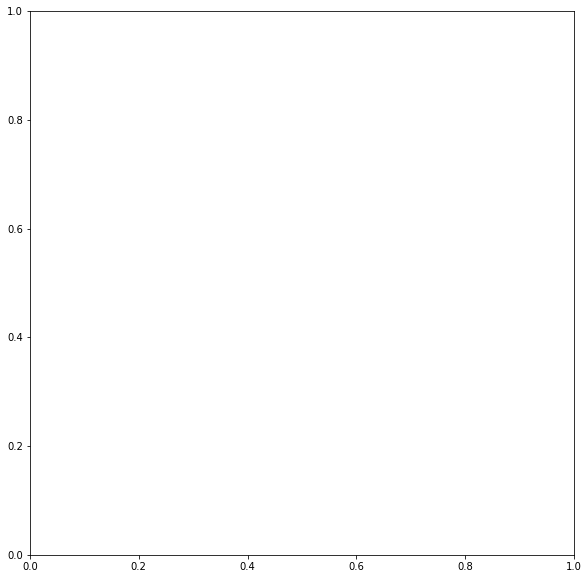

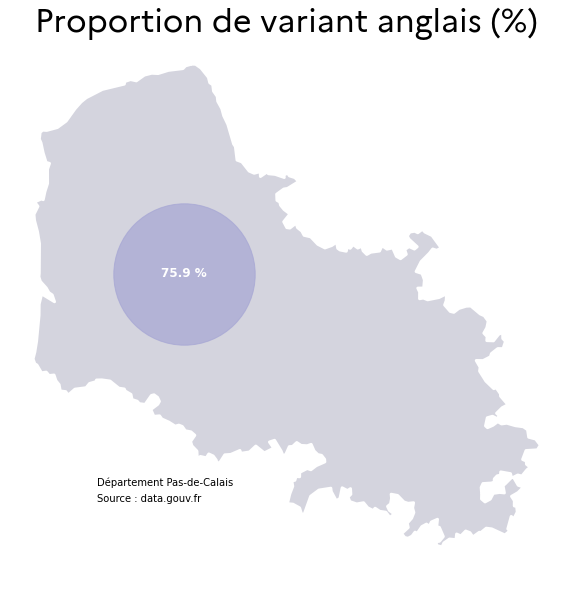

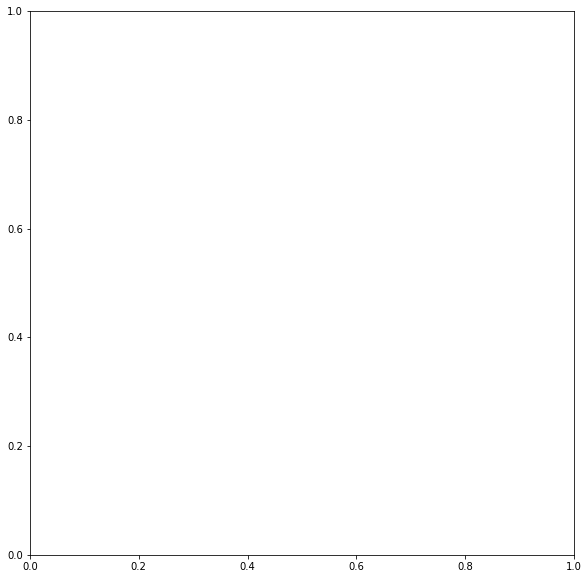

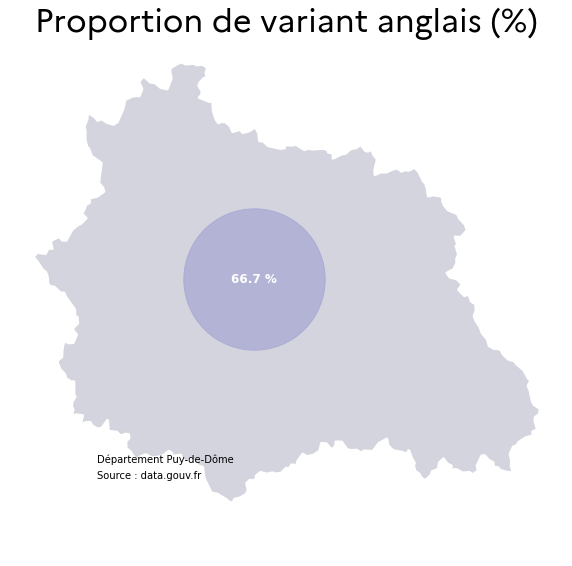

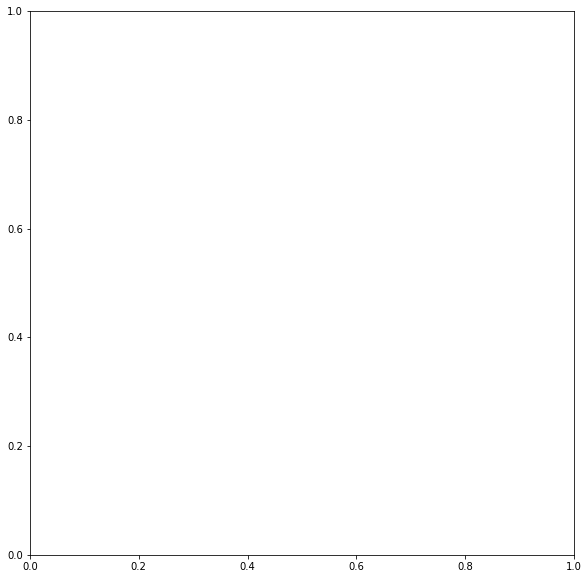

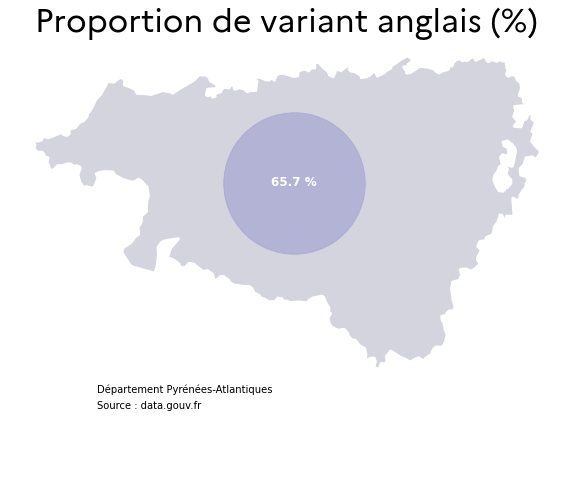

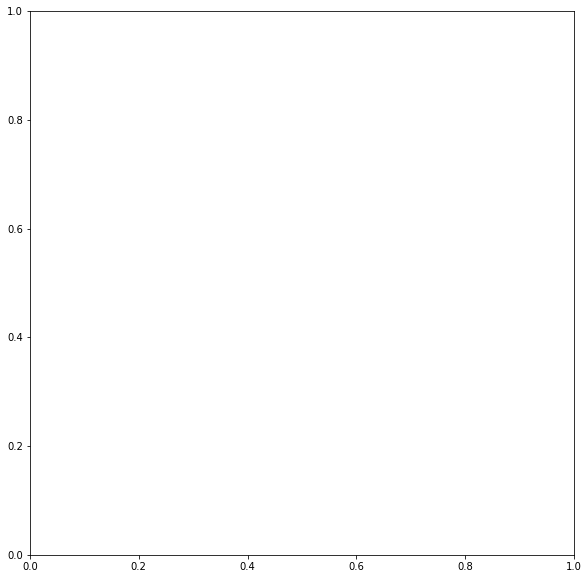

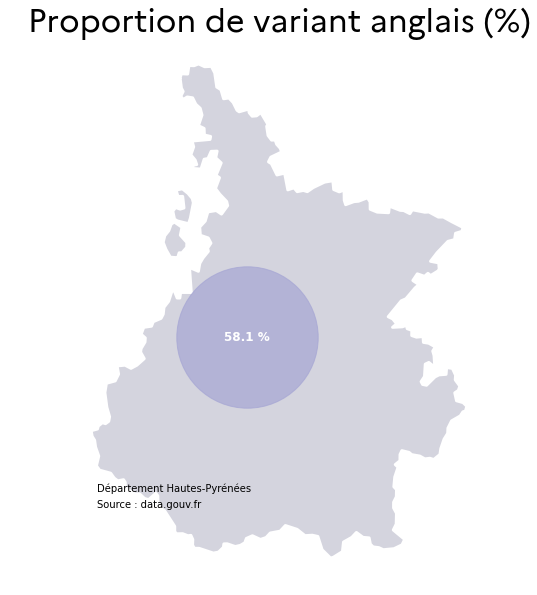

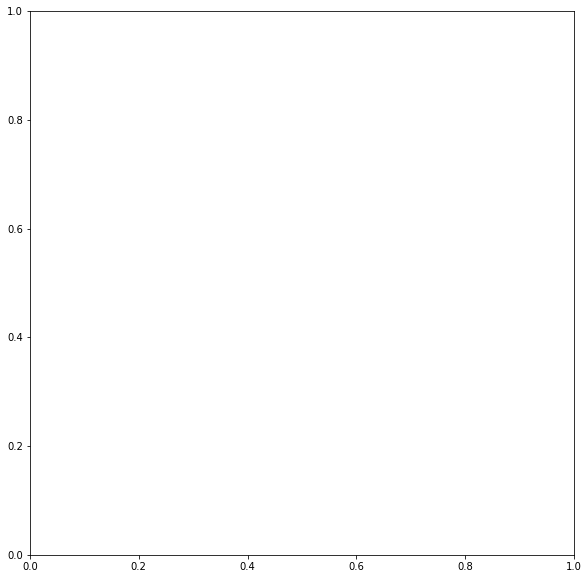

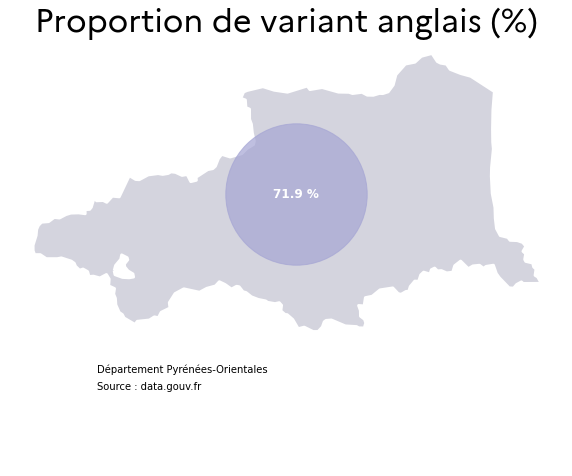

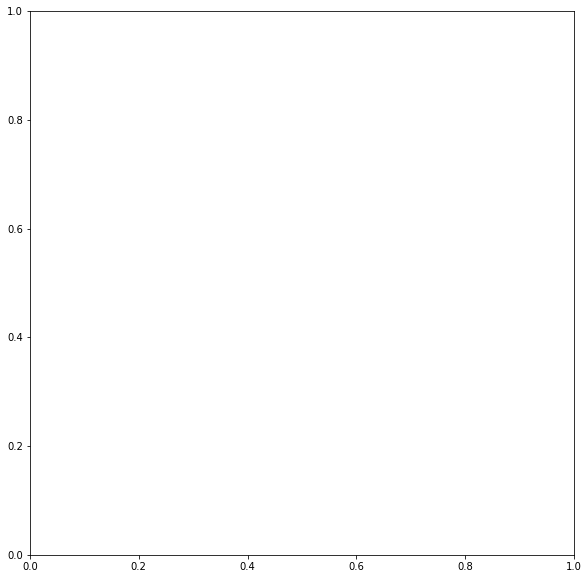

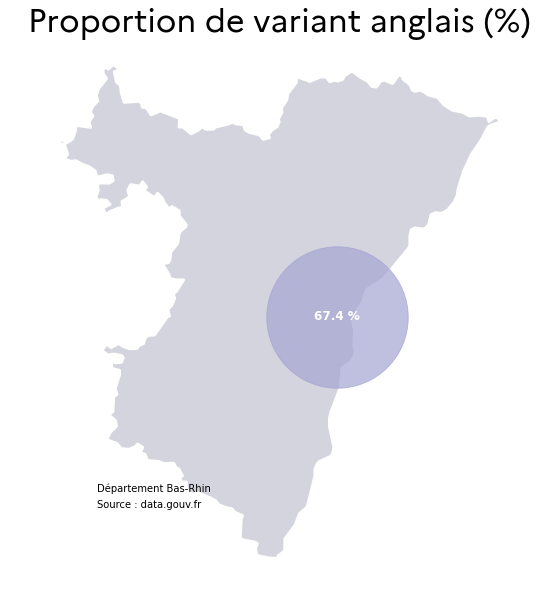

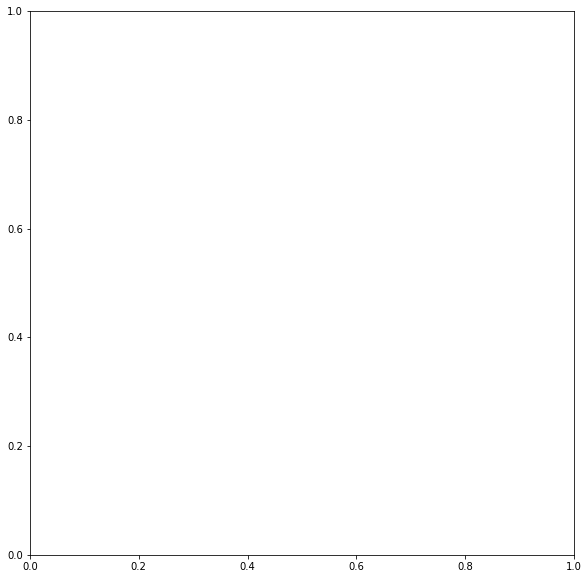

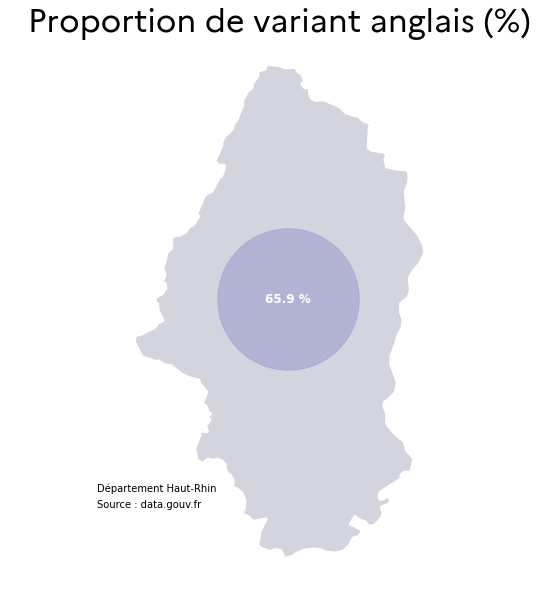

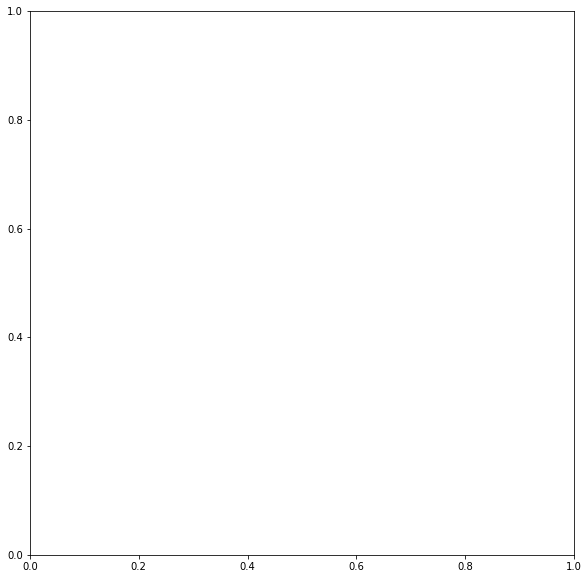

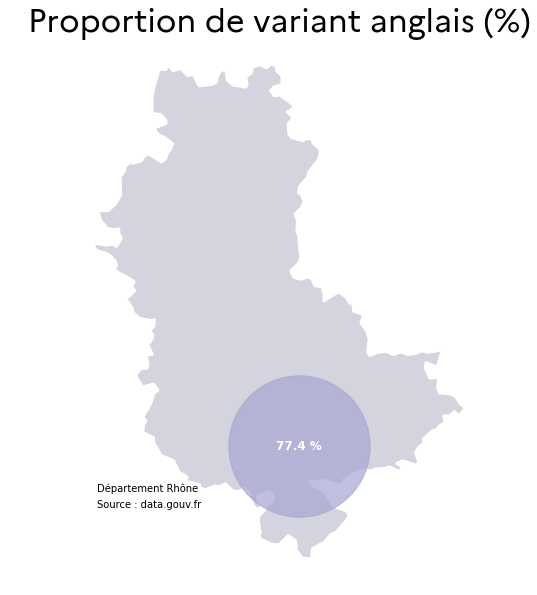

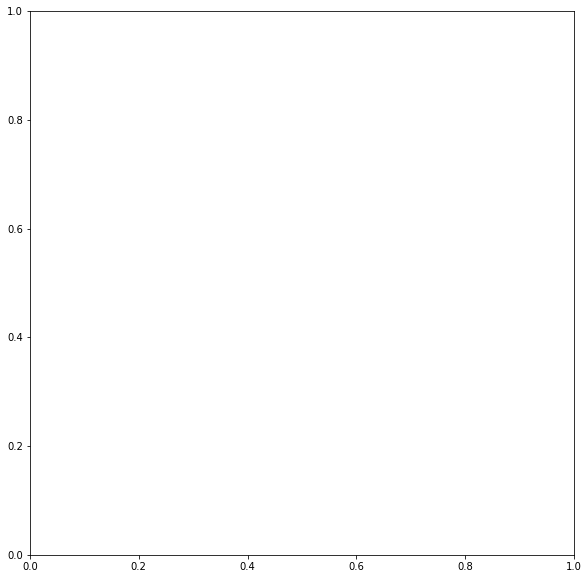

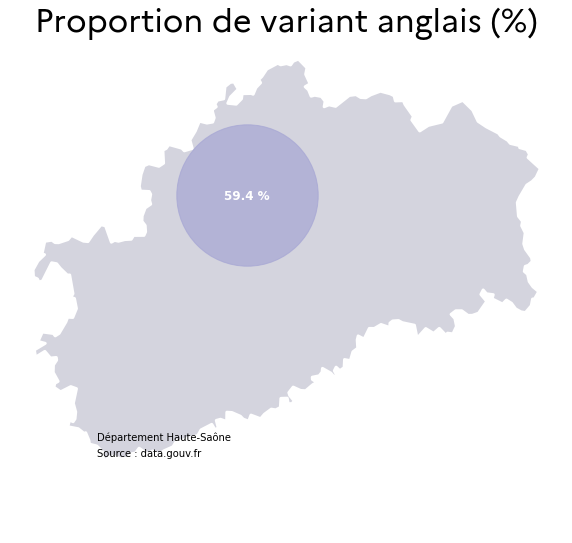

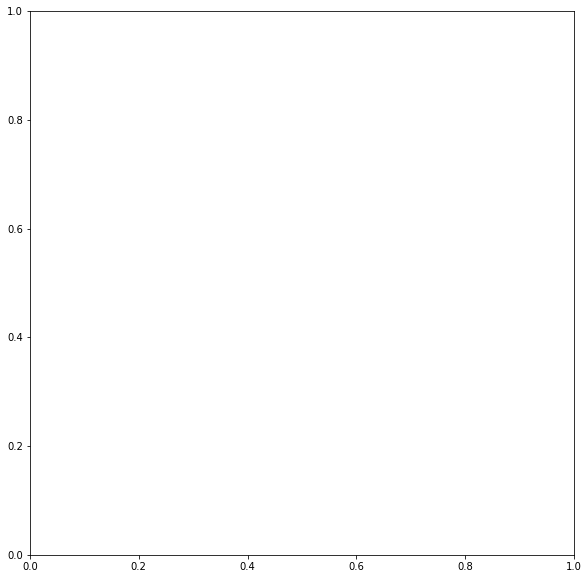

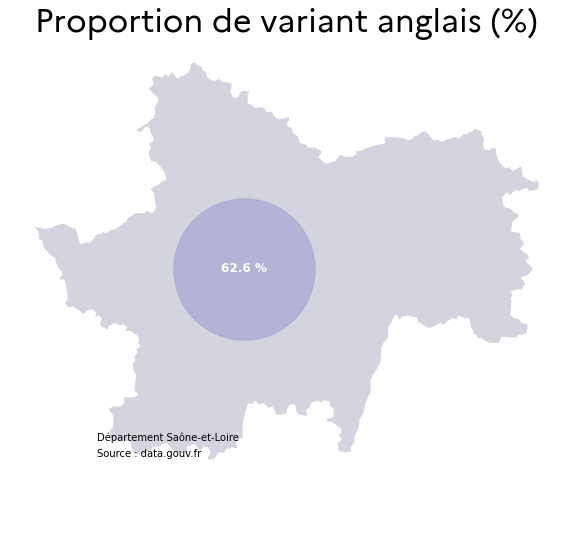

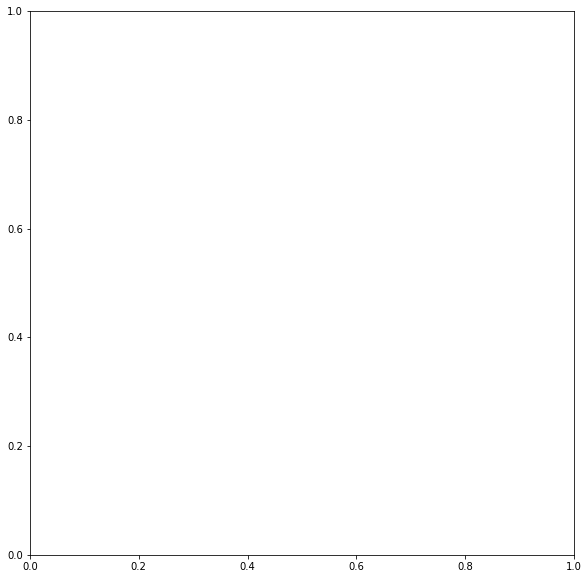

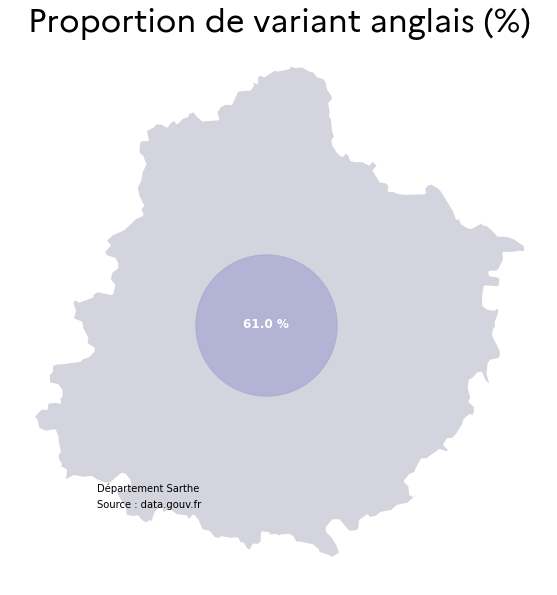

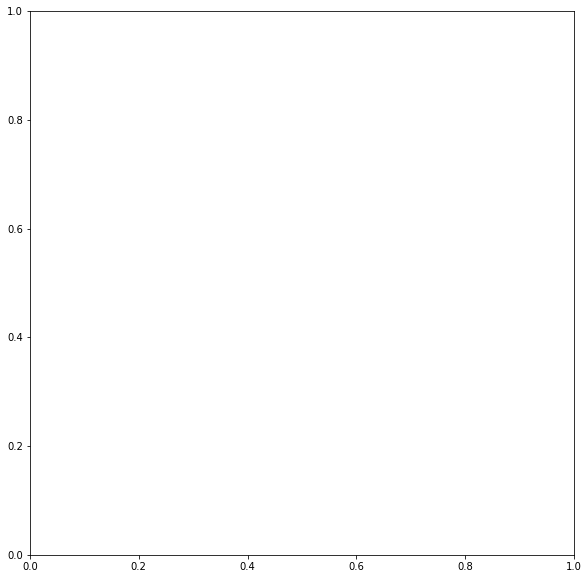

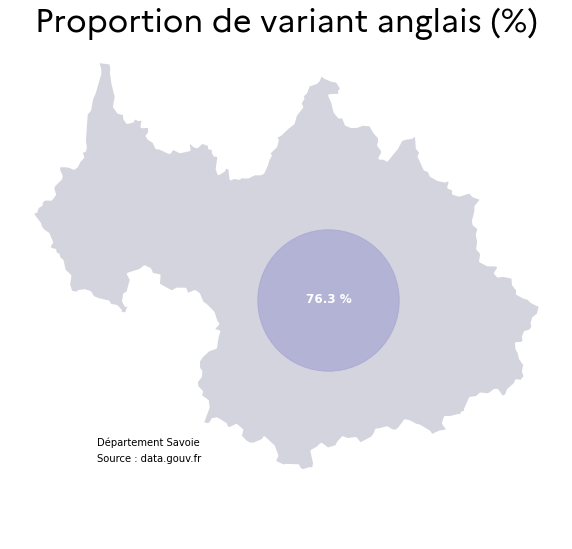

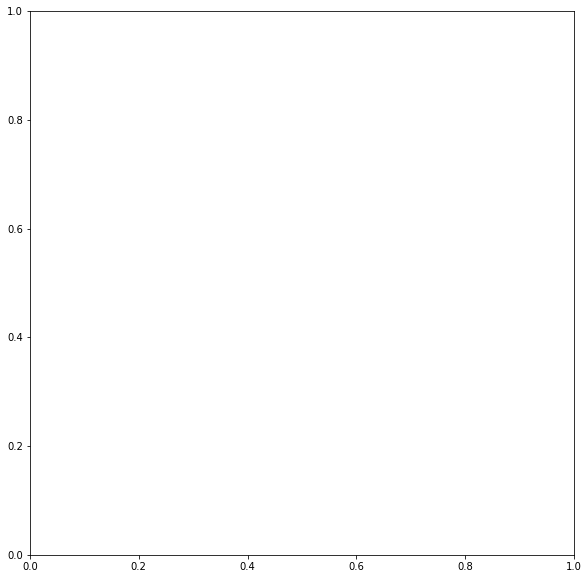

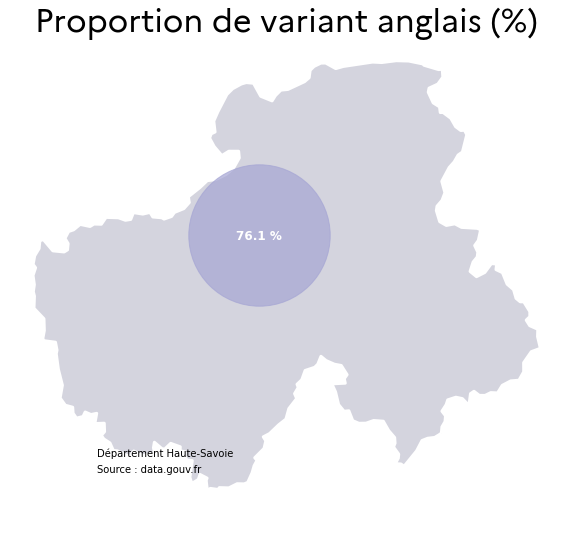

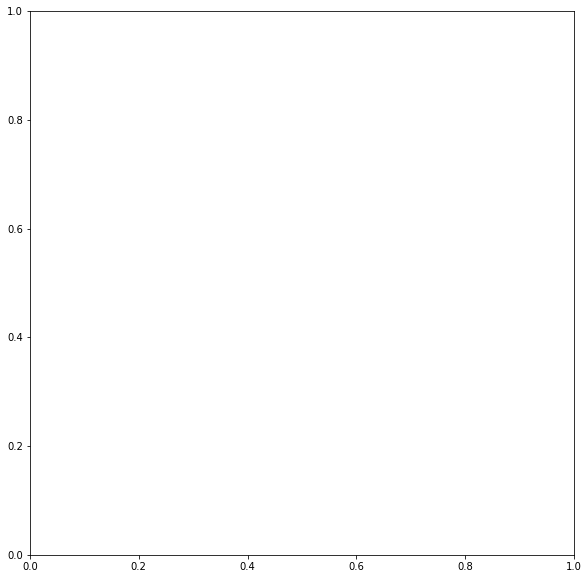

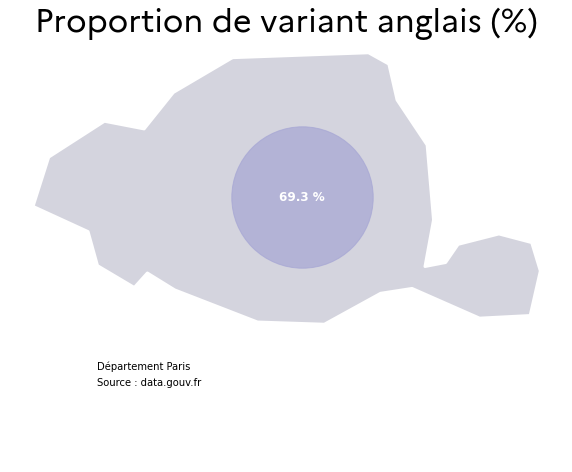

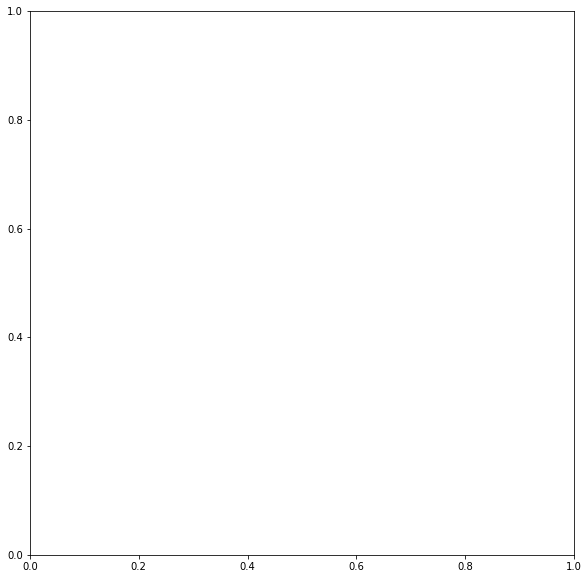

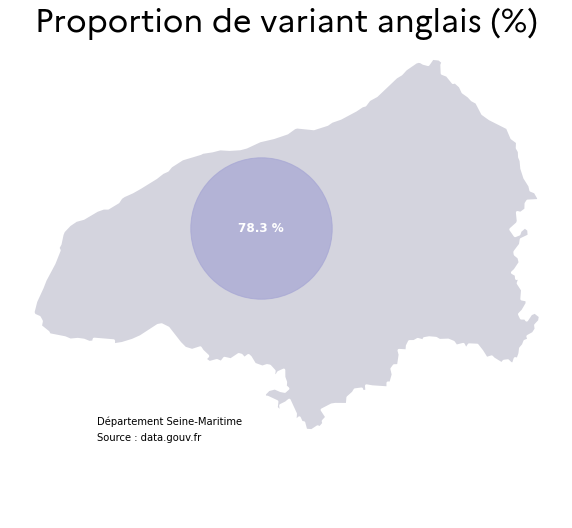

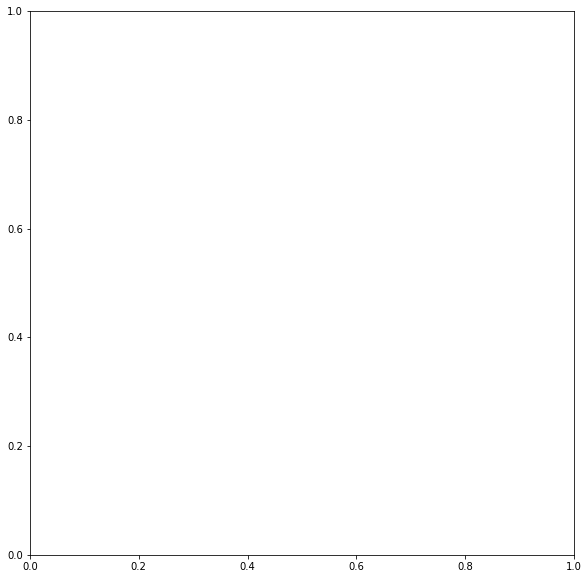

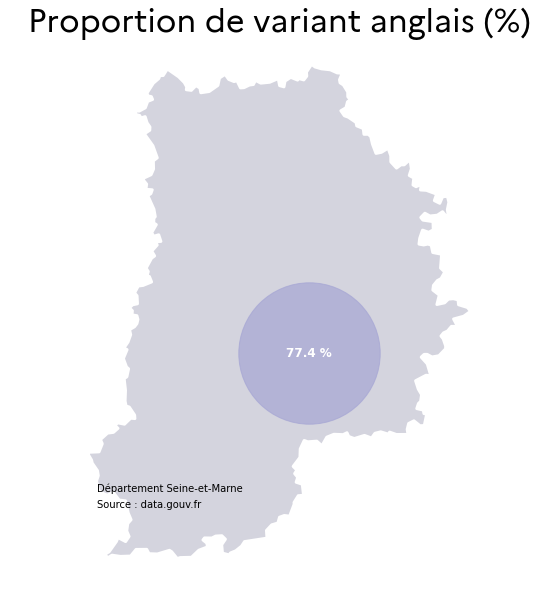

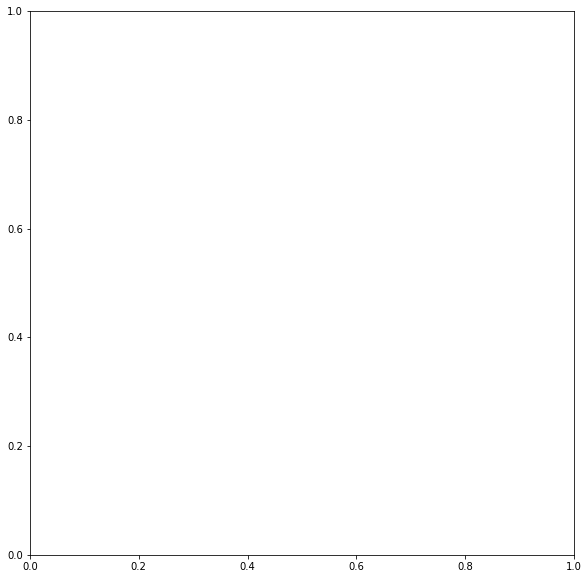

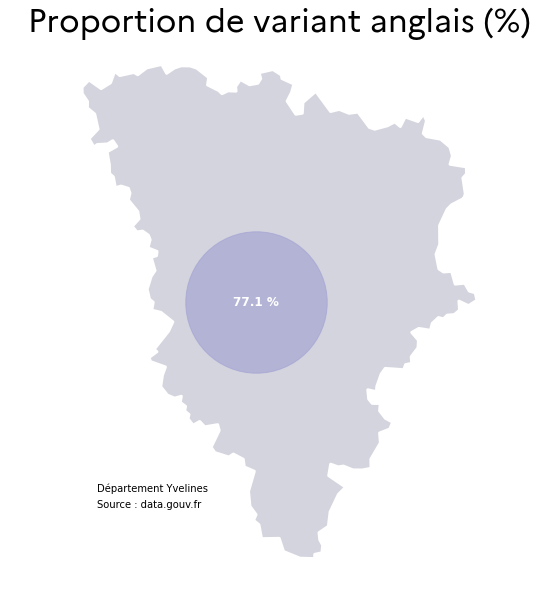

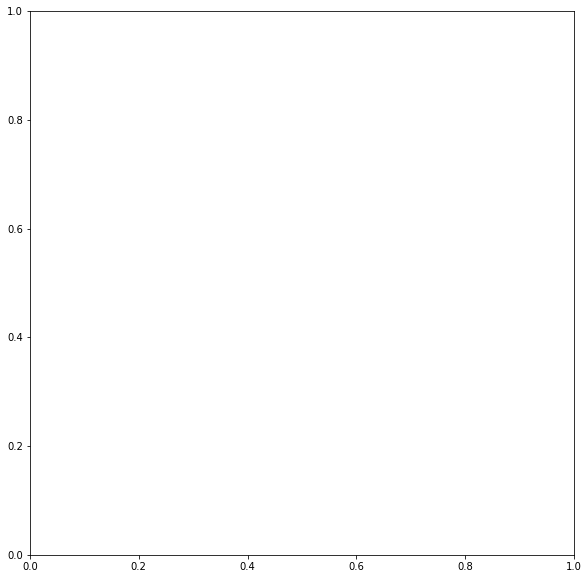

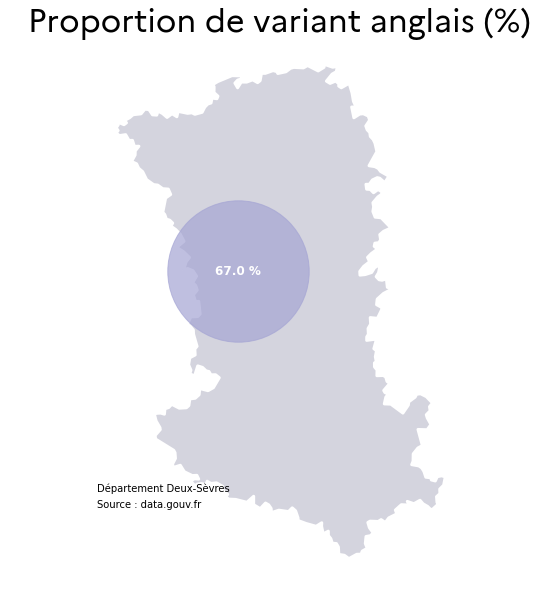

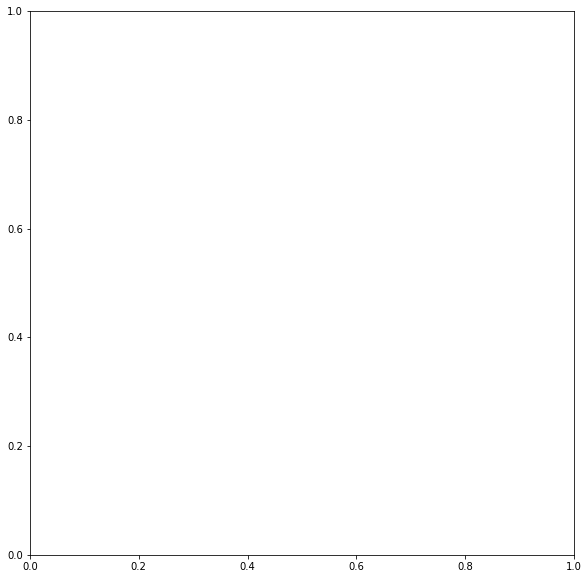

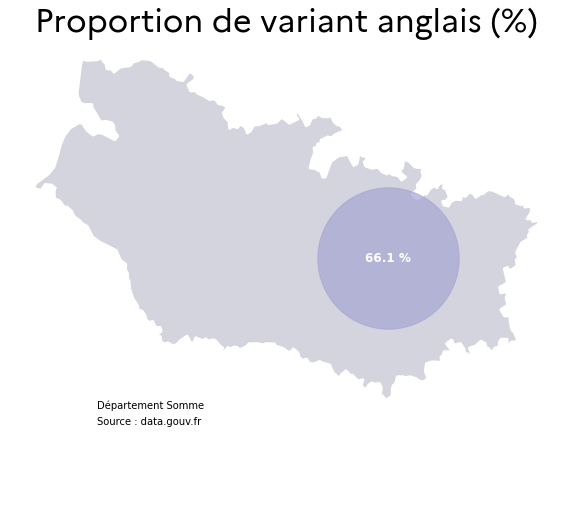

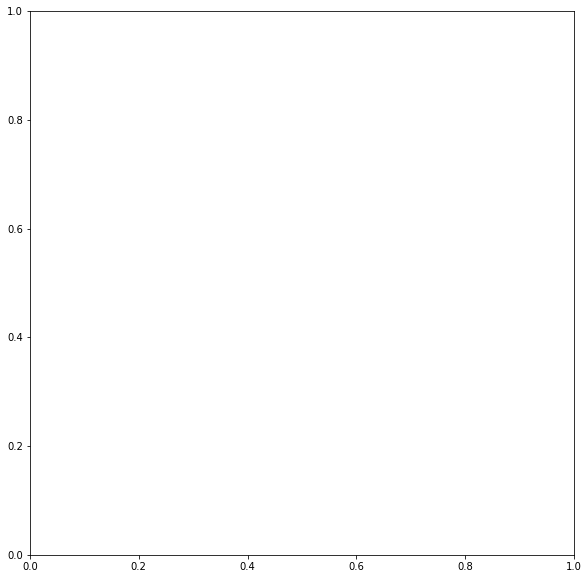

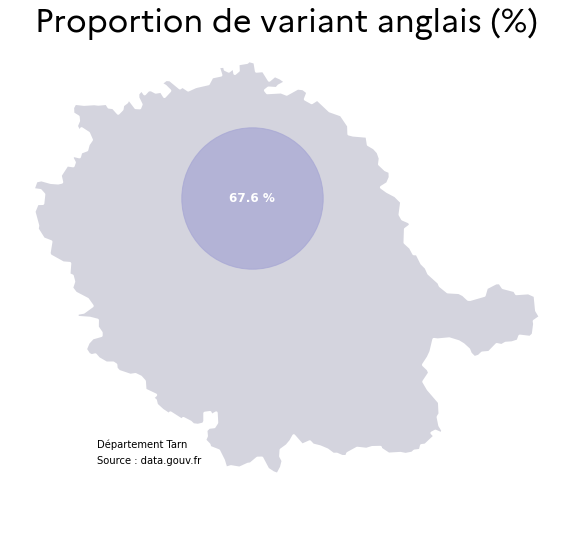

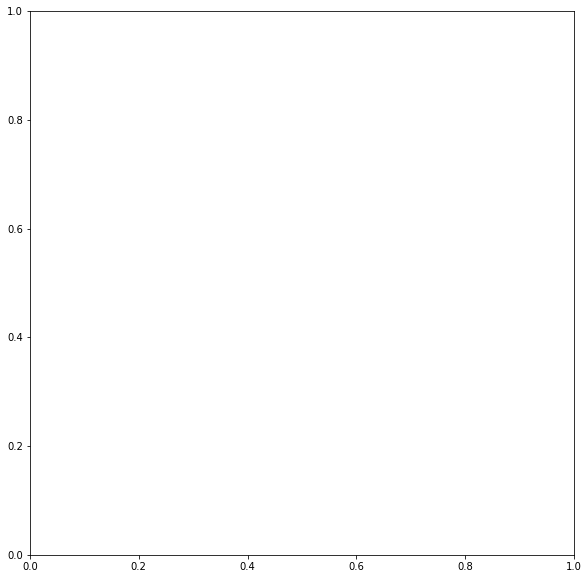

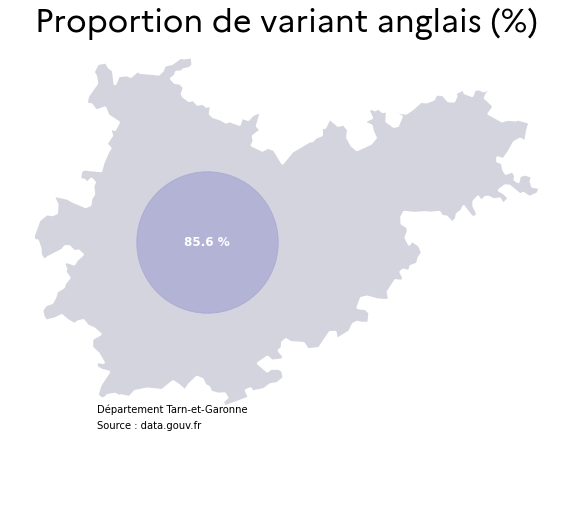

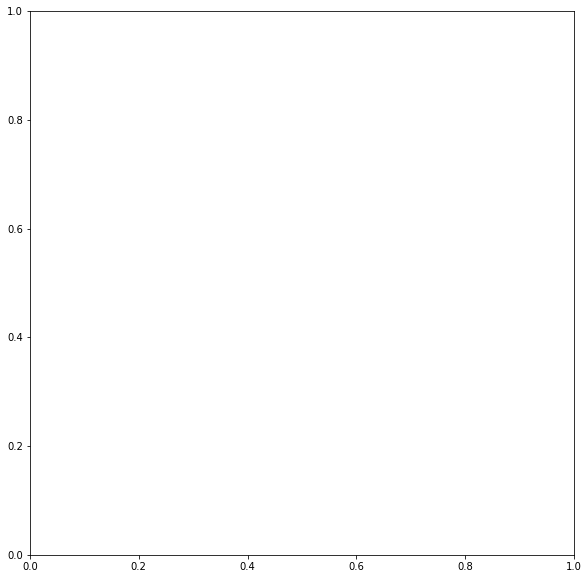

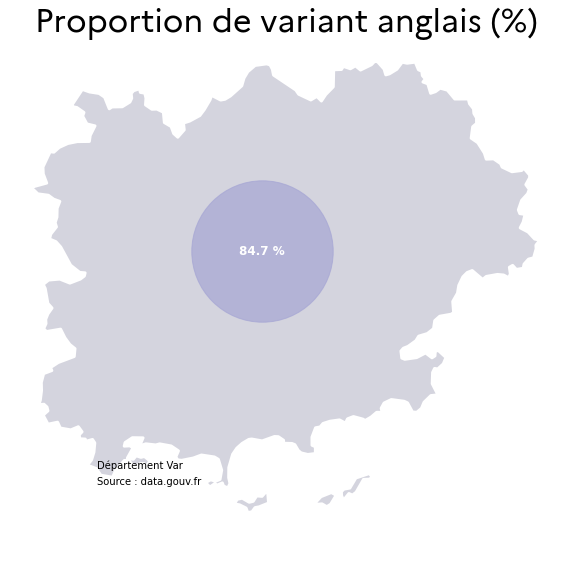

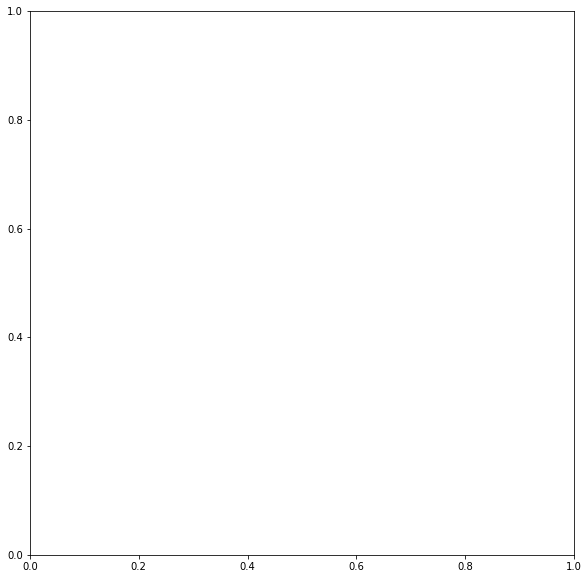

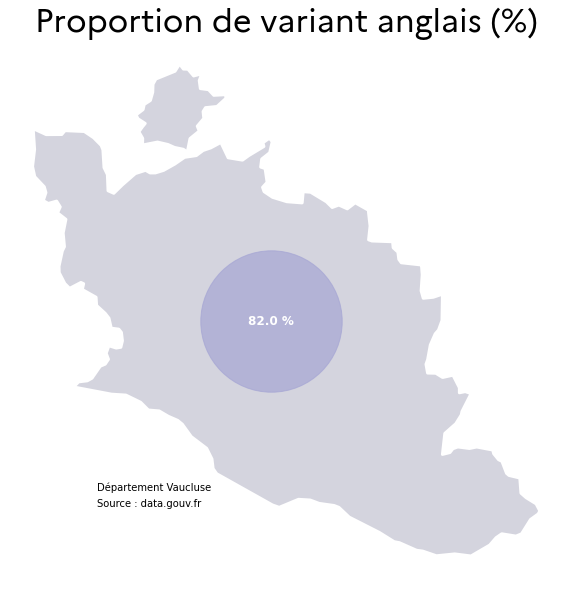

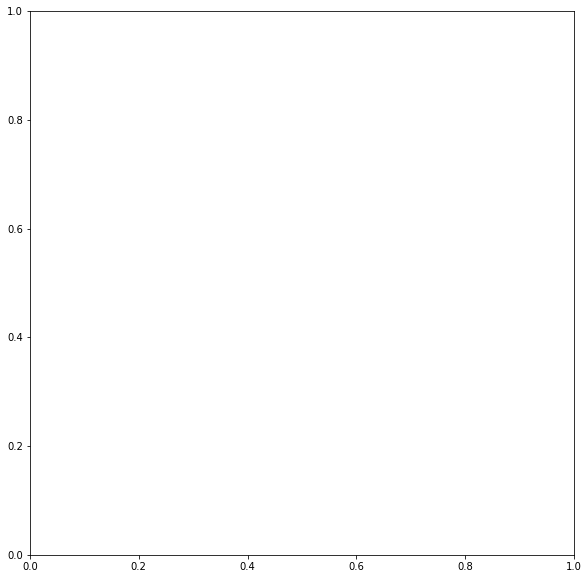

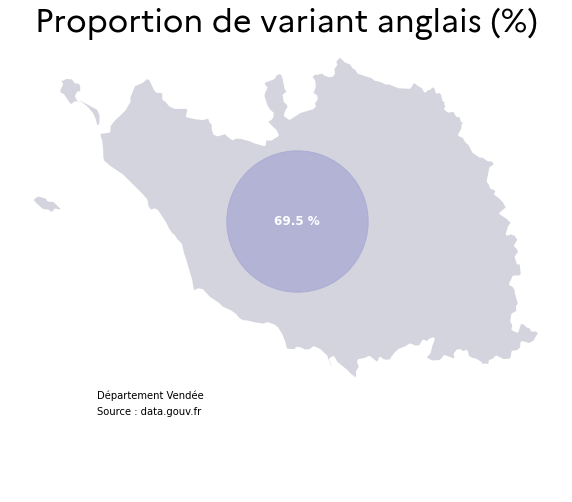

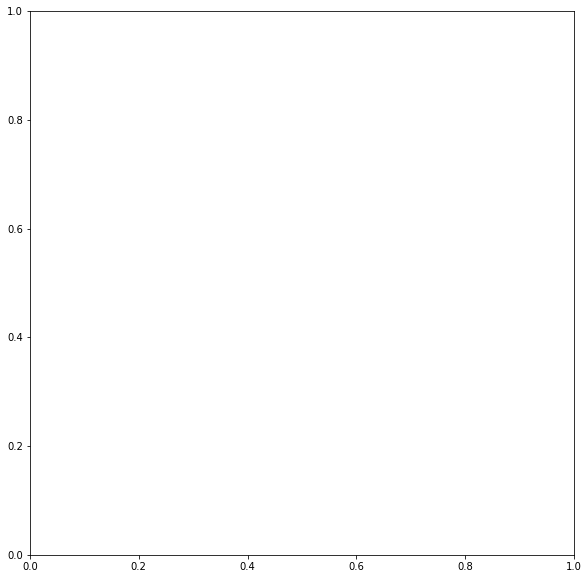

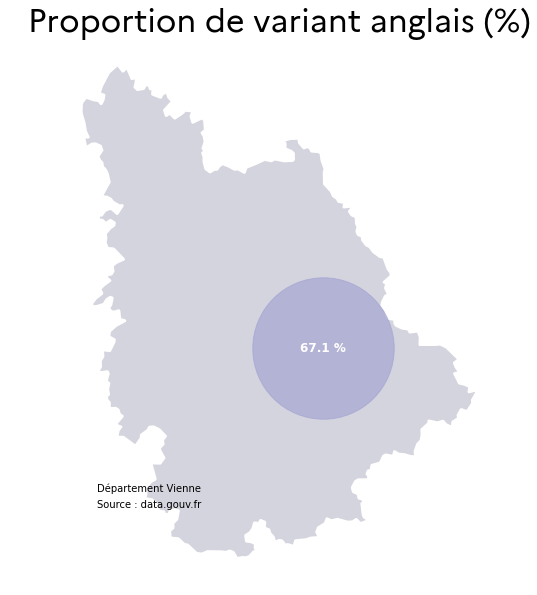

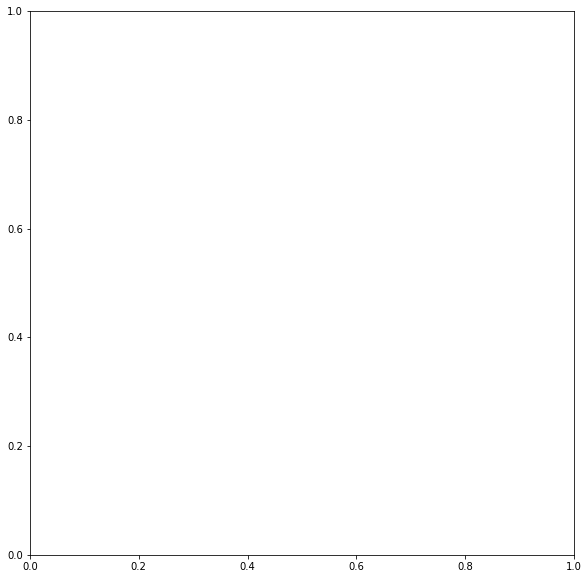

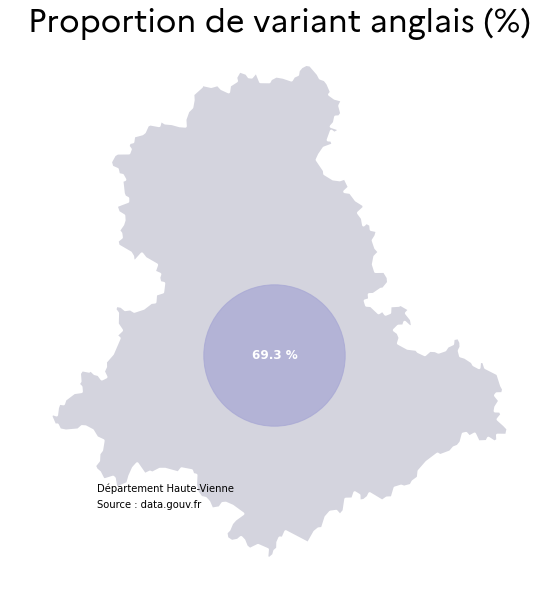

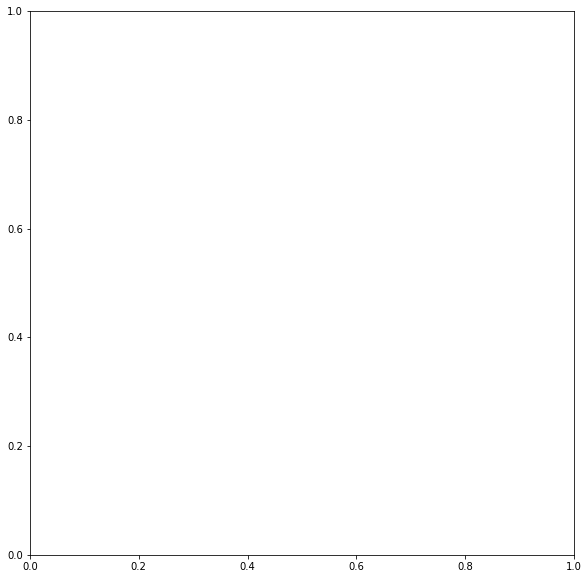

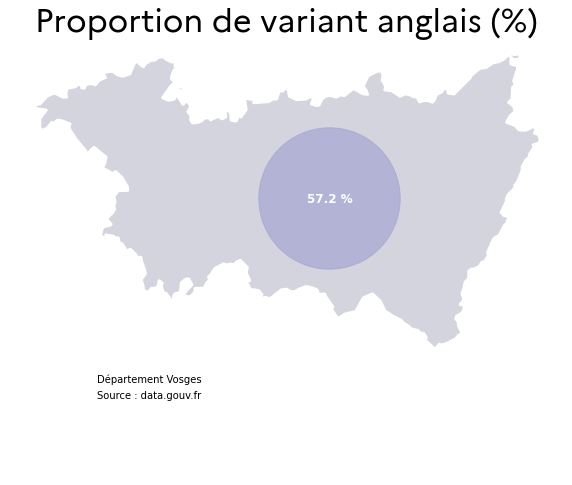

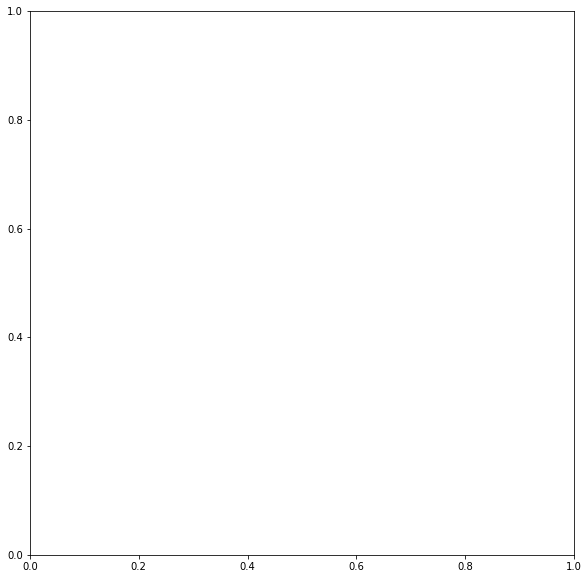

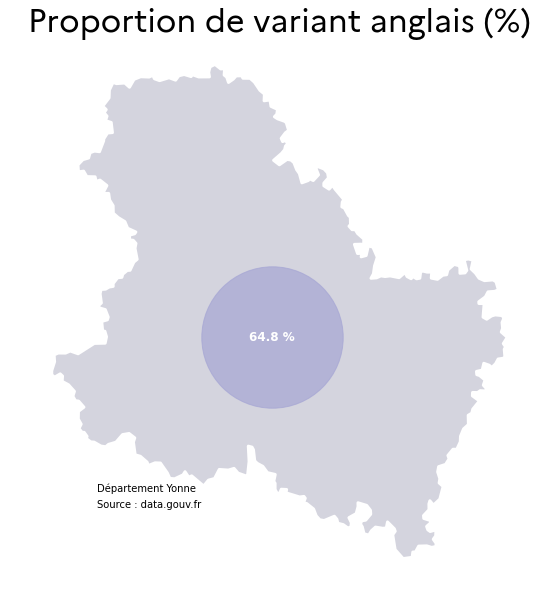

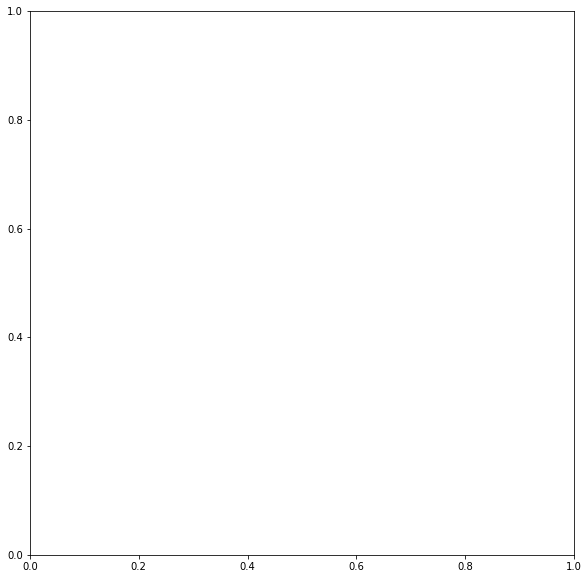

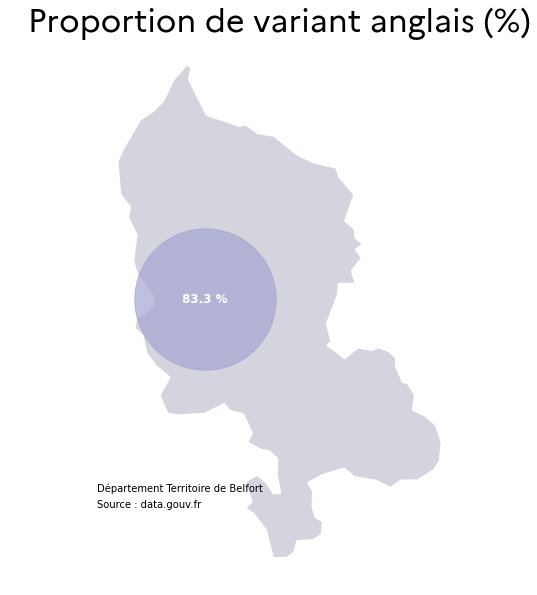

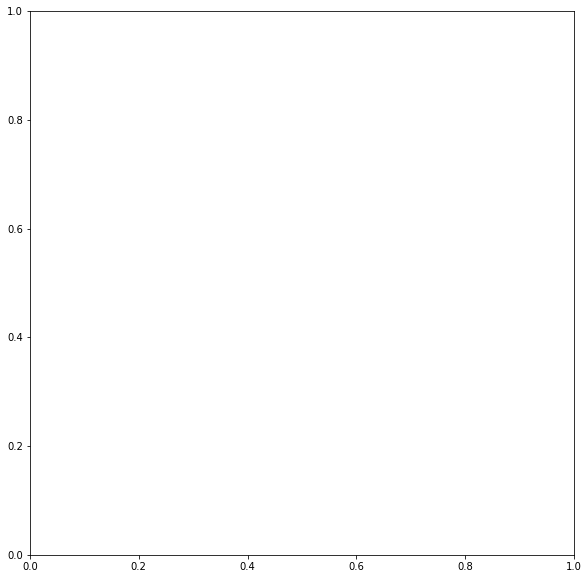

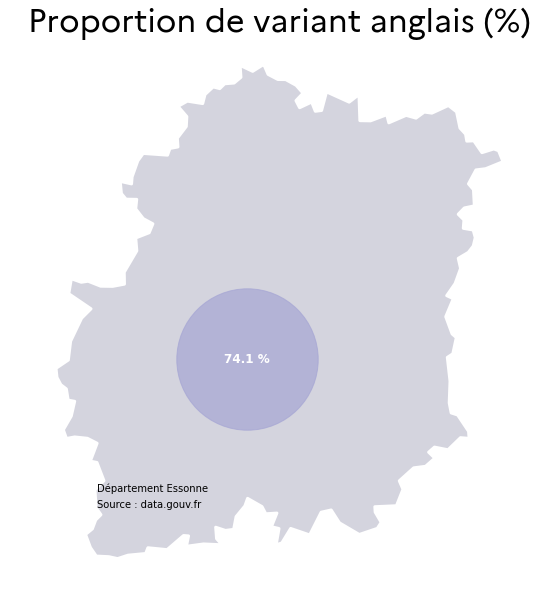

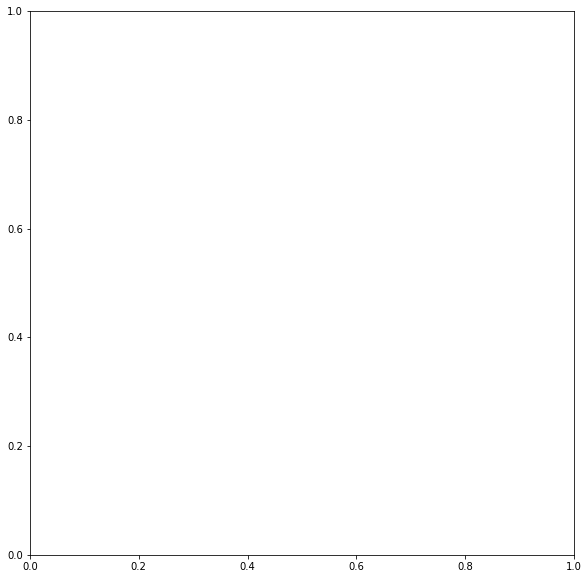

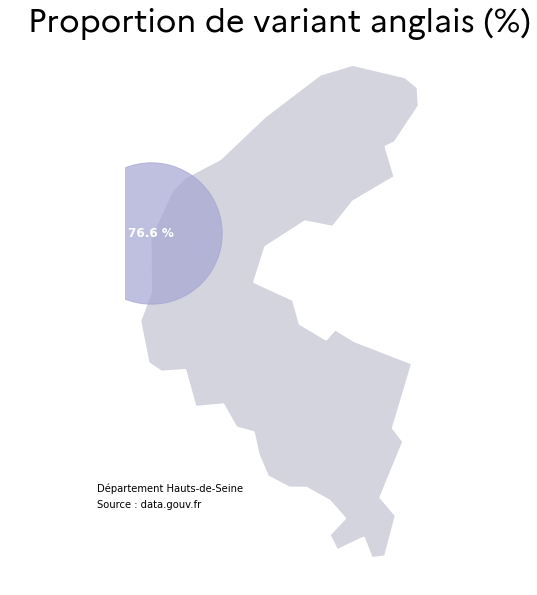

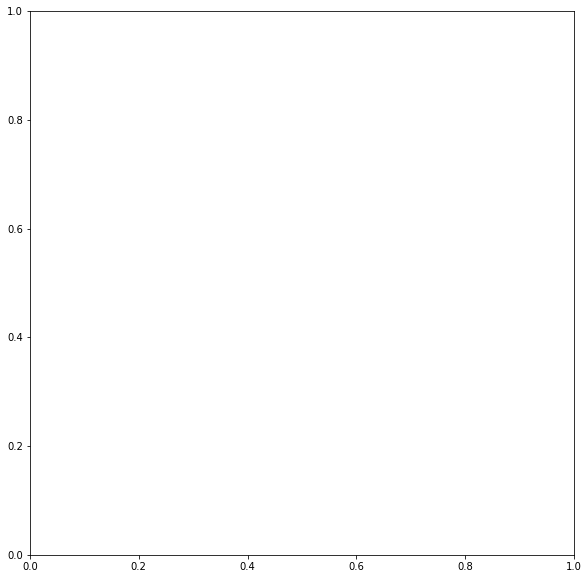

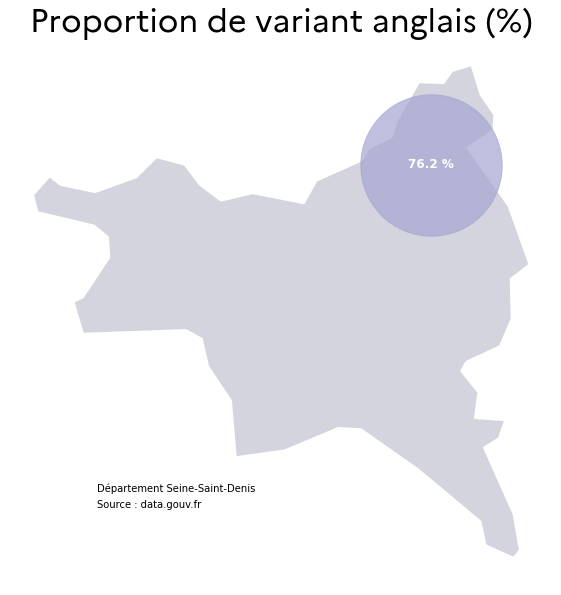

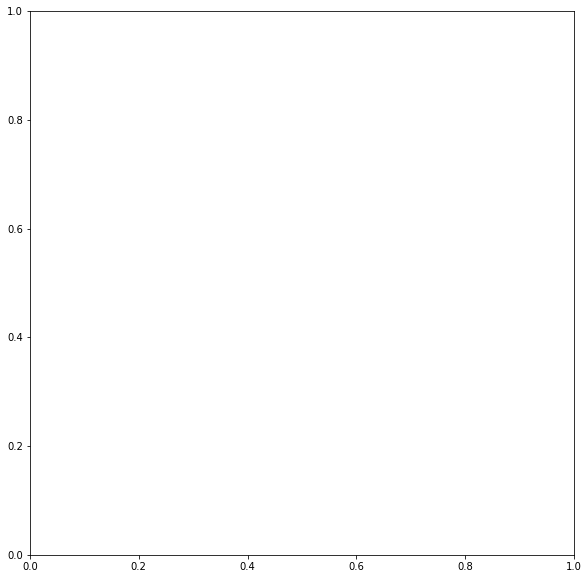

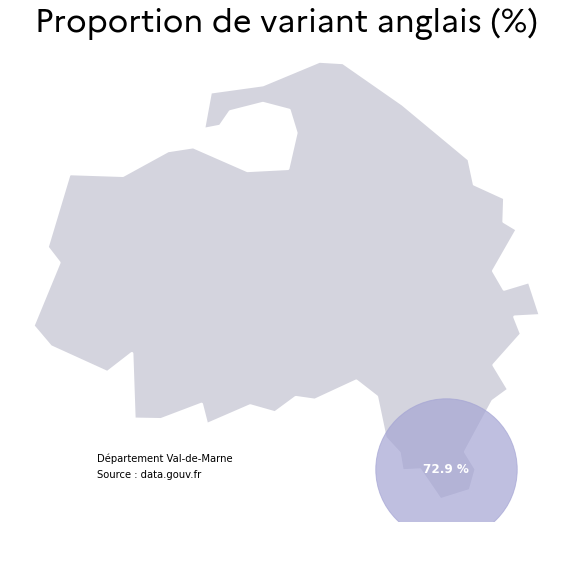

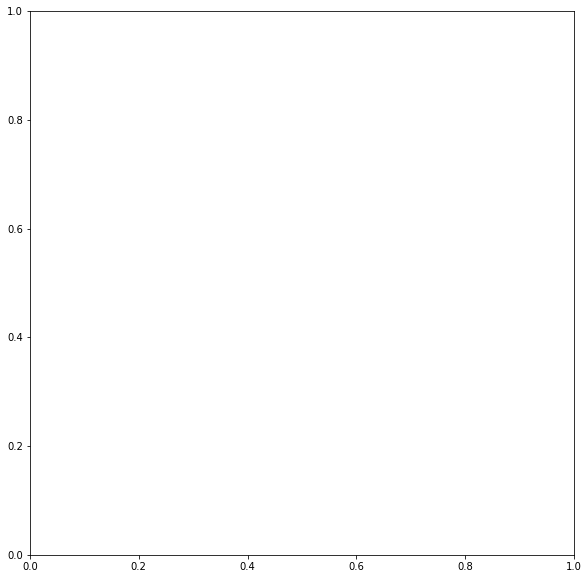

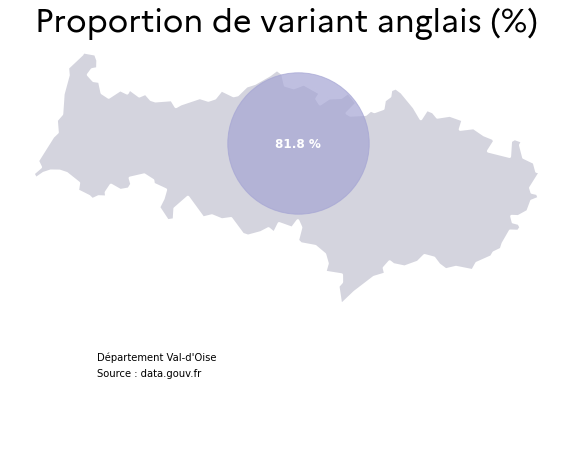

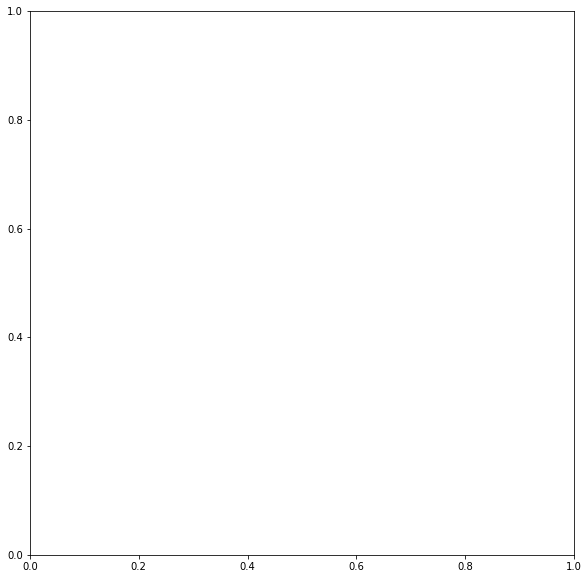

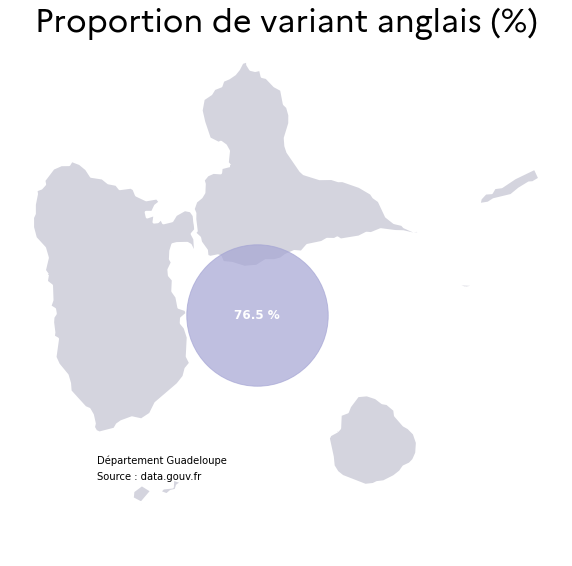

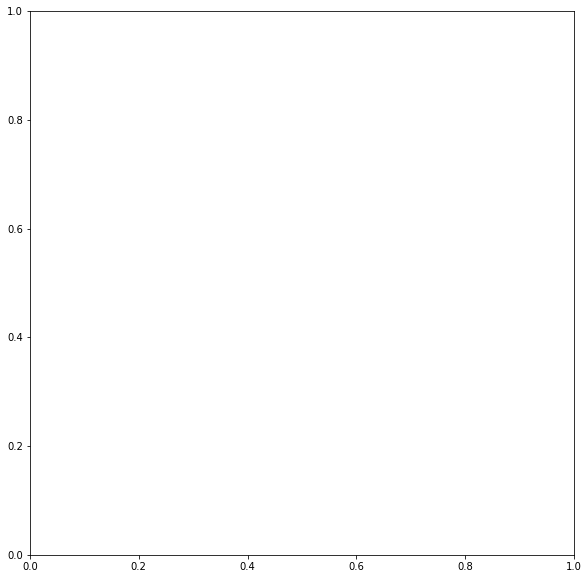

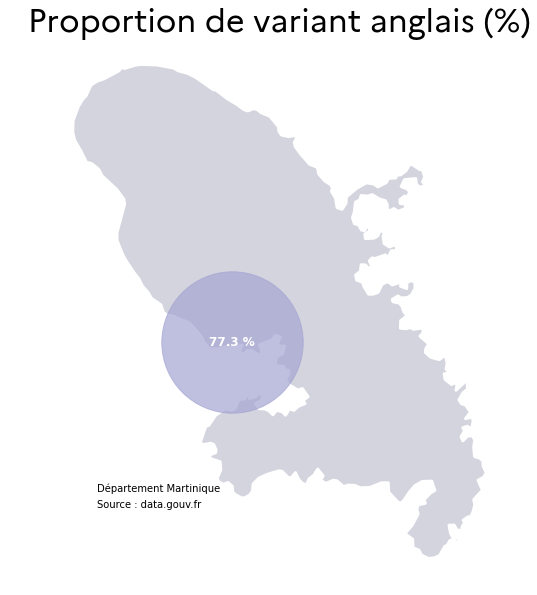

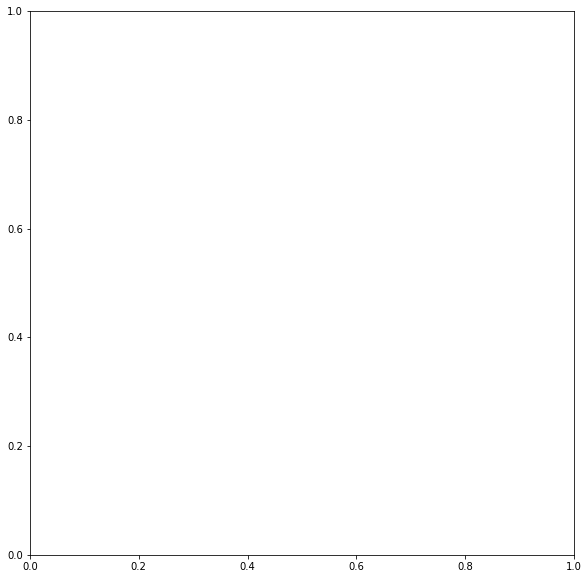

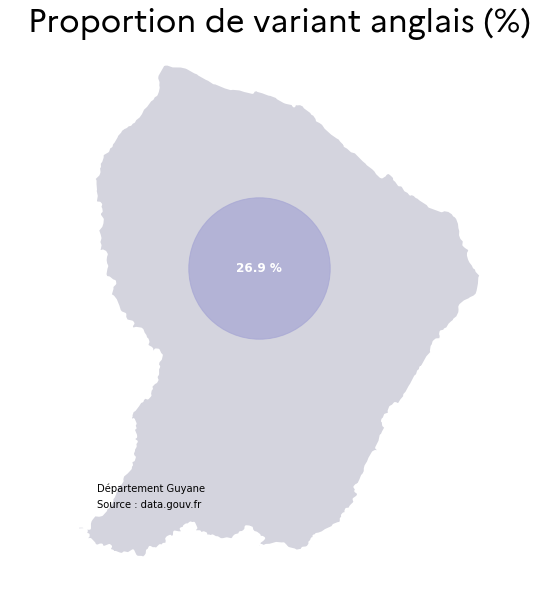

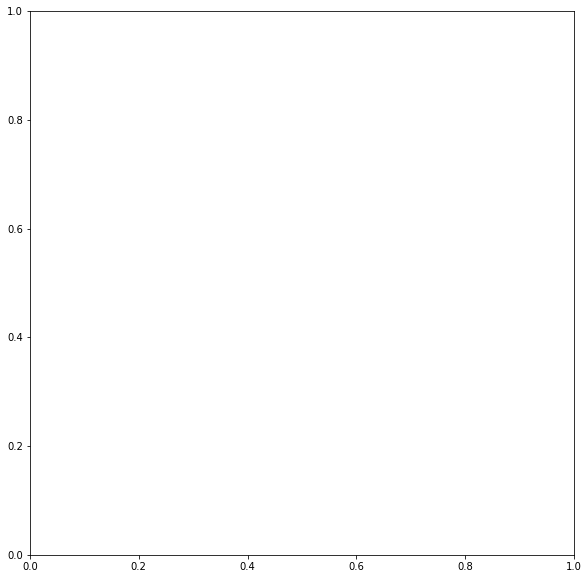

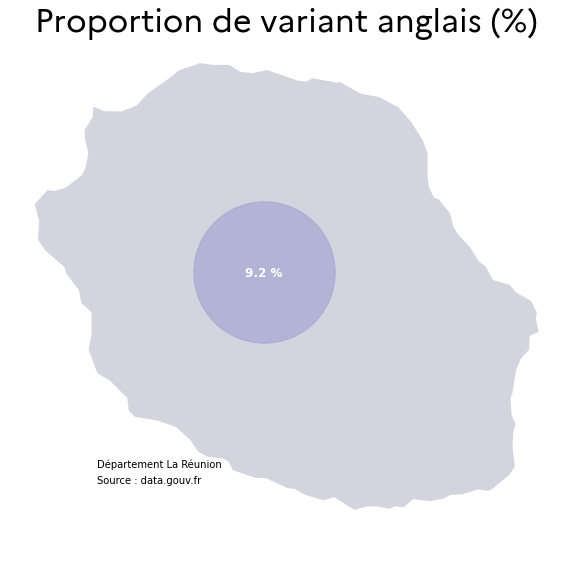

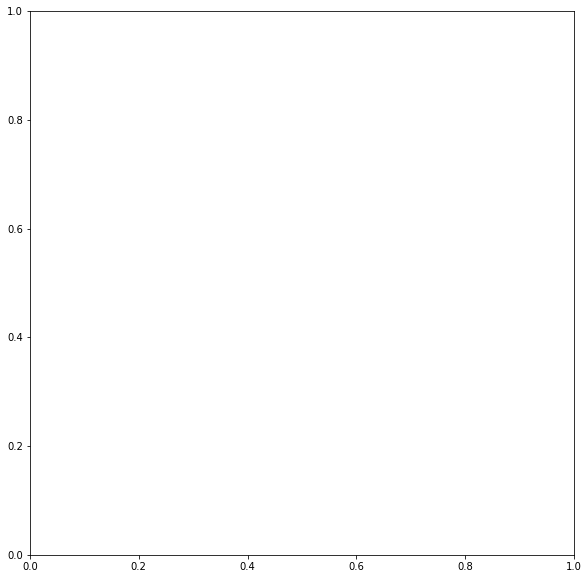

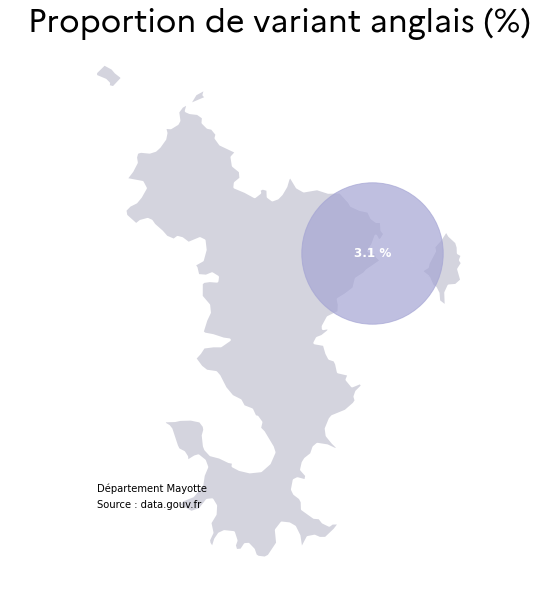

In [28]:
for r in df.DEP.unique():
    naq = df[df['DEP'] == r].DEP.unique()
    states = pd.merge(deps,data,on='code',how='left')
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    plt.rcParams['figure.figsize'] = (10, 10)
    #base = states[states['code'].isin(naq)].plot(column='data',edgecolor="white",linewidth=3)
    base = states[states['code'].isin(naq)].plot(color='#D4D4DE',edgecolor="white",linewidth=3)
    pref = points[points['DeptNum'].isin(naq)]
    max = states[states['code'].isin(naq)]['data'].max()
    min = states[states['code'].isin(naq)]['data'].min()
    for d in pref.DeptNum.unique():
        rd = states[states['code'] == d]['data'].iloc[0]
        if(max-min != 0):
            size = ((1000 * (1+(rd - min) / (max-min))) / pref.shape[0])*25
        else:
            size = 1000/pref.shape[0]*20
        pref[pref['DeptNum'] == d].plot(ax=base, marker='o', color='#A5A5D4',  alpha=0.7, markersize=size)
    base.axis('off')
    for dep in pref.DeptNum.unique():
        txt = str(states[states['code'] == dep]['data'].iloc[0])+' %'
        base.annotate(txt,
                      xy=(pref[pref['DeptNum'] == dep]['LonDD'].iloc[0],pref[pref['DeptNum'] == dep]['LatDD'].iloc[0]), 
                      color='white',
                      fontsize="large", weight='heavy',
                      horizontalalignment='center',
                      verticalalignment='center')
    base.set_title('Proportion de variant anglais (%)', fontproperties=prop, size=32)
    
    base.text(0, 0, 'Source : data.gouv.fr', horizontalalignment='left',
              verticalalignment='center', transform=ax.transAxes)
    base.text(0, 0.03, 'Département '+df[df['DEP'] == r]['LIBELLE'].iloc[0], horizontalalignment='left',
              verticalalignment='center', transform=ax.transAxes)
    base.figure.savefig('data/dep/variant-dep-'+r+'.png')